# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

The TMDb movie dataset contains information about 10,000 movies ranging from their budgets to their popularities. It includes:

* imdb id
* popularity
* budget
* revenue
* original title
* cast
* director
* overview
* runtime
* genres
* release date
* vote count
* vote average
* release year
* budget adj
* revenue adj

Where budget_ajd and revenue_adj are the budget and revenue calculated with inflation in mind.

Certain columns contain mutliple values separated by "|" that will require cleaning.

## Questions for Analysis

* What are the properties of movies that yield the highest revenue vs movies that have the least revenue?
* Which directors should be hired?
* What movie genres were most profitable in the years 2005-2010?
* What are the movies that have a profit of over 1,000,000,000 dollars with the least budget to profit ratio?

## Import Libraries

In [160]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import re 


%config InlineBackend.figure_format='retina'#Makes the plots look better



### Load the dataset

In [161]:
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
# Data Wrangling

## General Properties

### View the first 10 elements of the dataset

In [162]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### View all column names

In [163]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Basic information about each column

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Seeing how many duplicates there are

In [165]:
df.duplicated().sum()

1

### Viewing some of the cells that contain the character "|" to separate multiple values

In [166]:
df[['director','genres']].iloc[500:700]

,director,genres
500,Chris Rock,Comedy
501,Gerard Barrett,Drama
502,Angela Bassett,Romance|Drama|Music
503,Ben Safdie|Joshua Safdie,Drama
504,Morgan Neville,Music|Documentary
...,...,...
695,Mike Cahill,Science Fiction|Drama
696,Tim Story,Action|Comedy
697,Atom Egoyan,Thriller
698,Paul Thomas Anderson,Comedy|Romance|Crime|Drama|Mystery


## Data Cleaning

Some columns in the dataset contain null values, some more than others. Based on the questions above the columns `production_companies`, `keywords`, `tagline` and `homepage` are not needed to answer the questions above and they have a lot of null values. These columns can be dropped. 

Even after this, there are still more columns that contain null values. Since these columns contain important informaton for the questions, they cannot be dropped. Fortunately, only a very few rows (76 at most for some columns) contain null values. These rows can be dropped.

### Dropping null unnecessary Columns

In [167]:
df.drop(['production_companies','keywords','tagline','homepage'],axis=1,inplace=True)

### Dropping null rows

In [168]:
df.dropna(inplace=True)

### Adding a new `profits` column

Adding a profits column can be useful to indicate if the movie was successful or at the very least broke even.

In [169]:
df['profits'] = df['revenue']-df['budget']
df['profits_adj'] = df['revenue_adj']-df['budget_adj']

### Dropping Duplicate rows

#### Seeing how many duplicated rows there are

In [170]:
df.duplicated().sum()

1

#### Dropping all the duplicated rows

In [171]:
df.drop_duplicates(inplace=True)

#### Making sure there are no more duplicated rows

In [172]:
df.duplicated().sum()

0

### Seperating Cells that contain "|"

Some cells have the character "|", which must be cleaned before continuing. The idea is to find the cells with the "|" character, convert them to lists using the split() function then make a new row entry for every element of those lists using the explode() method. 

In the end they each must be placed in their own dataframe as not to interfere with calculations in analyses of other column values.

#### Separating `Director` cells that contain "|"

##### Finding the `director` cells that contain "|"

In [173]:
#getting a copy of the dataframe

df_director= df.copy()

In [174]:
df_directors = df_director.query('director.str.contains(r"[|]")',engine='python')
len(df_directors),df_directors

(736,
            id    imdb_id  popularity     budget     revenue  \
 8      211672  tt2293640    7.404165   74000000  1156730962   
 11      76757  tt1617661    6.189369  176000003   183987723   
 64     256591  tt2381941    2.395366   50100000   153962963   
 85     296099  tt1524930    2.000338   31000000   104384188   
 100    326359  tt4007502    1.724712          0           0   
 ...       ...        ...         ...        ...         ...   
 10795  148980  tt0077215    0.214124    3000000           0   
 10798   12185  tt0077663    0.188821          0           0   
 10816   16378  tt0077147    0.064602          0           0   
 10820   13377  tt0060345    1.227582     315000           0   
 10843   29710  tt0060588    0.252399          0           0   
 
                          original_title  \
 8                               Minions   
 11                    Jupiter Ascending   
 64                                Focus   
 85                             Vacation   
 100

##### Convert the strings to lists here.

The `director` column stores the multiple values in each cell as a string. By splitting the string by "|" it will return a list of values.

In [175]:
df_directors['director'] = df_directors['director'].apply(lambda x: x.split("|"))

C:\Users\MrIzzat\AppData\Local\Temp\ipykernel_3848\3873550034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_directors['director'] = df_directors['director'].apply(lambda x: x.split("|"))


##### Explode the lists

The lists can be exploded so that each value is placed separately in each row.

In [176]:
df_directors = df_directors.explode('director')

##### Get rid of the original strings

In [177]:
df_director.drop(df_directors.index,inplace=True)

##### Add the new rows back

In [178]:
df_director = pd.concat([df_director,df_directors], ignore_index=True)

##### Check out the new changes

In [179]:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11766 entries, 0 to 11765
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11766 non-null  int64  
 1   imdb_id         11766 non-null  object 
 2   popularity      11766 non-null  float64
 3   budget          11766 non-null  int64  
 4   revenue         11766 non-null  int64  
 5   original_title  11766 non-null  object 
 6   cast            11766 non-null  object 
 7   director        11766 non-null  object 
 8   overview        11766 non-null  object 
 9   runtime         11766 non-null  int64  
 10  genres          11766 non-null  object 
 11  release_date    11766 non-null  object 
 12  vote_count      11766 non-null  int64  
 13  vote_average    11766 non-null  float64
 14  release_year    11766 non-null  int64  
 15  budget_adj      11766 non-null  float64
 16  revenue_adj     11766 non-null  float64
 17  profits         11766 non-null 

##### Confirming no more director cells contain "|"

In [180]:
len(df_director.query('director.str.contains(r"[|]")',engine='python'))

0

In [181]:
df_director.shape

(11766, 19)

#### Separating `Genre` cells that contain "|"

##### Applying the same idea as the `director` column.

In [182]:
df_genre = df.copy()

In [183]:
df_genres = df_genre.query('genres.str.contains(r"[|]")',engine="python")
len(df_genres),df_directors

(8454,
            id    imdb_id  popularity     budget     revenue  \
 8      211672  tt2293640    7.404165   74000000  1156730962   
 8      211672  tt2293640    7.404165   74000000  1156730962   
 11      76757  tt1617661    6.189369  176000003   183987723   
 11      76757  tt1617661    6.189369  176000003   183987723   
 64     256591  tt2381941    2.395366   50100000   153962963   
 ...       ...        ...         ...        ...         ...   
 10816   16378  tt0077147    0.064602          0           0   
 10820   13377  tt0060345    1.227582     315000           0   
 10820   13377  tt0060345    1.227582     315000           0   
 10843   29710  tt0060588    0.252399          0           0   
 10843   29710  tt0060588    0.252399          0           0   
 
                          original_title  \
 8                               Minions   
 8                               Minions   
 11                    Jupiter Ascending   
 11                    Jupiter Ascending   
 64

##### Convert the strings to lists here.

In [184]:
df_genres['genres'] = df_genres['genres'].apply(lambda x: x.split("|"))

C:\Users\MrIzzat\AppData\Local\Temp\ipykernel_3848\1823303782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['genres'] = df_genres['genres'].apply(lambda x: x.split("|"))


##### Explode the lists

In [185]:
df_genres = df_genres.explode('genres')

##### Get rid of the original strings

In [186]:
df_genre.drop(df_genres.index,inplace=True)

##### Add the new rows back

In [187]:
df_genre = pd.concat([df_genre,df_genres], ignore_index=True)

##### Check out the new changes

In [188]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26731 entries, 0 to 26730
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26731 non-null  int64  
 1   imdb_id         26731 non-null  object 
 2   popularity      26731 non-null  float64
 3   budget          26731 non-null  int64  
 4   revenue         26731 non-null  int64  
 5   original_title  26731 non-null  object 
 6   cast            26731 non-null  object 
 7   director        26731 non-null  object 
 8   overview        26731 non-null  object 
 9   runtime         26731 non-null  int64  
 10  genres          26731 non-null  object 
 11  release_date    26731 non-null  object 
 12  vote_count      26731 non-null  int64  
 13  vote_average    26731 non-null  float64
 14  release_year    26731 non-null  int64  
 15  budget_adj      26731 non-null  float64
 16  revenue_adj     26731 non-null  float64
 17  profits         26731 non-null 

### Filling movies with a runtime of 0 with the average runtime

There are some movies that have a runtime of 0, which is an impossible. Since they are only 30 movies, they can be removed, but it would be better to make use of them. To do so, the movies with a runtime of zero will be set to the average runtime.

### Number of movies with a runtime of 0

In [189]:
len(df[df['runtime']==0])

27

### Setting the movies with a runtime of zero to the average runtime

In [190]:
df_runtimezero = df[df['runtime']==0]

df_runtimezero['runtime'] =  np.int64(df['runtime'].mean()) #since the runtime column is an int64 data type, the mean should be converted to an int64 format

C:\Users\MrIzzat\AppData\Local\Temp\ipykernel_3848\127606105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runtimezero['runtime'] =  np.int64(df['runtime'].mean()) #since the runtime column is an int64 data type, the mean should be converted to an int64 format


### Dropping the rows that originally contained a runtime of 0

In [191]:
df.drop(df_runtimezero.index,inplace=True)

### Adding the new rows

In [192]:
df = pd.concat([df,df_runtimezero])

### Confirming there are no more movies with a runtime of 0

In [193]:
len(df[df['runtime']==0])

0

### The dataset after cleaning

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10724 entries, 0 to 8874
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10724 non-null  int64  
 1   imdb_id         10724 non-null  object 
 2   popularity      10724 non-null  float64
 3   budget          10724 non-null  int64  
 4   revenue         10724 non-null  int64  
 5   original_title  10724 non-null  object 
 6   cast            10724 non-null  object 
 7   director        10724 non-null  object 
 8   overview        10724 non-null  object 
 9   runtime         10724 non-null  int64  
 10  genres          10724 non-null  object 
 11  release_date    10724 non-null  object 
 12  vote_count      10724 non-null  int64  
 13  vote_average    10724 non-null  float64
 14  release_year    10724 non-null  int64  
 15  budget_adj      10724 non-null  float64
 16  revenue_adj     10724 non-null  float64
 17  profits         10724 non-null  int64

<a id='eda'></a>
# Exploratory Data Analysis

## What are the properties of movies that yield the highest revenue vs movies that have the least revenue?

### Finding the movies with the most and least revenue

#### First, the movies with the most and least revenues should be defined. Checking out some quantiles and value_counts() should indicate where is a good place to draw line between high and low revenue movies.

In [195]:
df['revenue'].value_counts()

revenue
0            5881
12000000       10
10000000        8
11000000        6
2000000         6
             ... 
93354918        1
76578641        1
171269535       1
215000000       1
33736689        1
Name: count, Length: 4698, dtype: int64

#### Checking out the distribution of the values

Over 5881 movies yielded 0 revenue. That would indicate that a quantile over 50% is needed for the highest revenue movies.


In [196]:
df['revenue'].quantile([0.54,0.55,0.60,0.75,0.80,0.85,0.90,0.95])

0.54    0.000000e+00
0.55    1.300000e+01
0.60    1.126109e+06
0.75    2.500980e+07
0.80    4.058220e+07
0.85    6.776670e+07
0.90    1.142552e+08
0.95    2.149923e+08
Name: revenue, dtype: float64

Based on this information, a good place would be to check the top 10% highest revenue earning movies as well as the bottom 65% of movies to get a good range of revenues for movies. i.e. movies beyond quantile 90% and belue quantile 65%. 

In [197]:
df_mostRevenue = df[df['revenue']>= df['revenue'].quantile(.90)]
df_leastRevenue = df[df['revenue']< df['revenue'].quantile(.65)]

### Checking basic information about the movies with the highest and lowest revenues

In [198]:
len(df_mostRevenue['revenue']) 

1073

In [199]:
len(df_leastRevenue)

6970

In [200]:
df_mostRevenue['revenue'].describe()

count    1.073000e+03
mean     3.001876e+08
std      2.417096e+08
min      1.142811e+08
25%      1.539978e+08
50%      2.150000e+08
75%      3.516923e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [201]:
df_leastRevenue['revenue'].describe()

count    6.970000e+03
mean     2.831246e+05
std      9.849223e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.108720e+06
Name: revenue, dtype: float64

### Taking a look at and Plotting some of the different properties of the highest and lowest revenue movies

Some interesting properties to look at are: `budget`, `runtime` and `popularity`. Which basically ask these sub-questions:

* Can higher budgets increase a movie's revenue?
* What is the average runtime of highest and lowest revenue movies?
* Do movies that are more popular have more or less revenue?

#### Can higher budgets increase a movie's revenue?

##### Average Budgets for highest and lowest revenue movies

Finding the average budgets for the highest and lowest revenue movies

In [202]:
least_revenue_average_budget = math.floor(df_leastRevenue['budget'].mean())
f'{least_revenue_average_budget:,}'

'2,991,935'

In [203]:
most_revenue_average_budget = math.floor(df_mostRevenue['budget'].mean())
f'{most_revenue_average_budget:,}'

'74,465,160'

##### Proportion of average budgets

The budgets of the movies with the highest revenue is almost 25 times more than the budgets of the movies with the lowest revenue.

In [204]:
most_revenue_average_budget/least_revenue_average_budget

24.888628930775567

##### Function for bar plots

In [205]:
def revenue_create_double_bar_plot(bar1_x,bar1_y,bar2_x,bar2_y,xlabel,ylabel,title):
    plt.bar(bar1_x, bar1_y)
    plt.bar(bar2_x,bar2_y )
    plt.xlabel(xlabel,labelpad=10)
    plt.ylabel(ylabel,labelpad=15)
    plt.title(title,pad=20,fontsize = 16)
    plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

##### Plotting the the average budgets

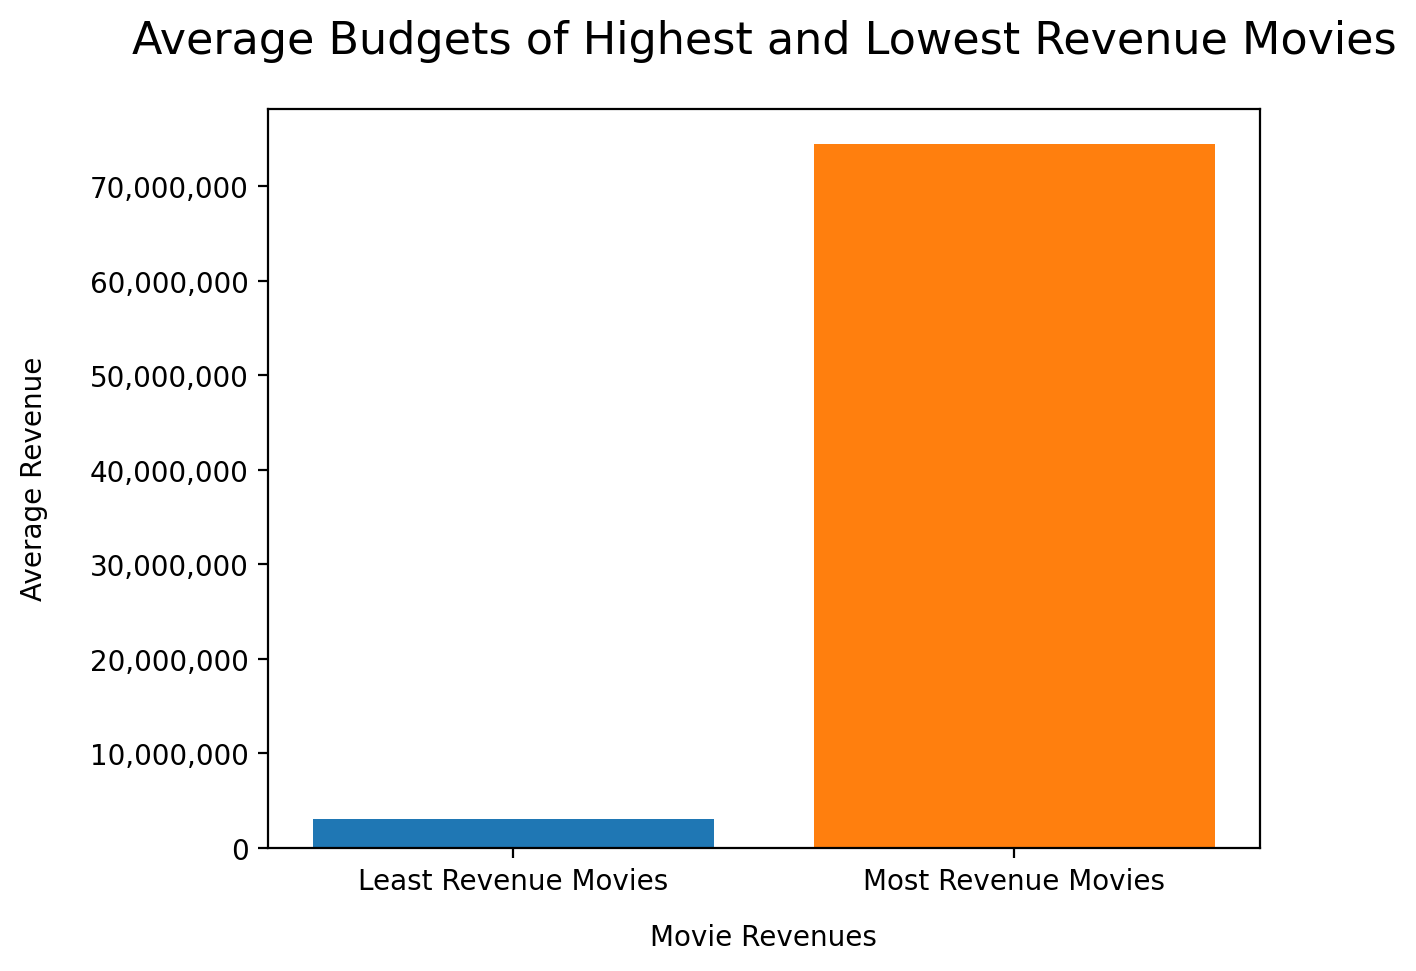

In [206]:
revenue_create_double_bar_plot("Least Revenue Movies",least_revenue_average_budget,"Most Revenue Movies",most_revenue_average_budget,
                       "Movie Revenues","Average Revenue","Average Budgets of Highest and Lowest Revenue Movies")

#### What is the average runtime of highest and lowest revenue movies?

##### Finding the average runtimes for the highest and lowest revenue movies

In [207]:
least_revenue_average_runtime = math.floor(df_leastRevenue['runtime'].mean())
f'{least_revenue_average_runtime:,}'

'98'

In [208]:
most_revenue_average_runtime = math.floor(df_mostRevenue['runtime'].mean())
f'{most_revenue_average_runtime:,}'

'116'

##### Propotion of average runtimes

The runtimes of the movies with the highest revenue is around 1.2 times more than the budgets of the movies with the lowest revenue. Which means movies with higher revenues tend to be 18 minutes longer. Meaning movies with more revenue tend to be close to 2 hours while movies with low revenue tend to be closer to 1 and a half hours.

In [209]:
most_revenue_average_runtime/least_revenue_average_runtime

1.183673469387755

In [210]:
most_revenue_average_runtime - least_revenue_average_runtime

18

##### Plotting the the average runtimes

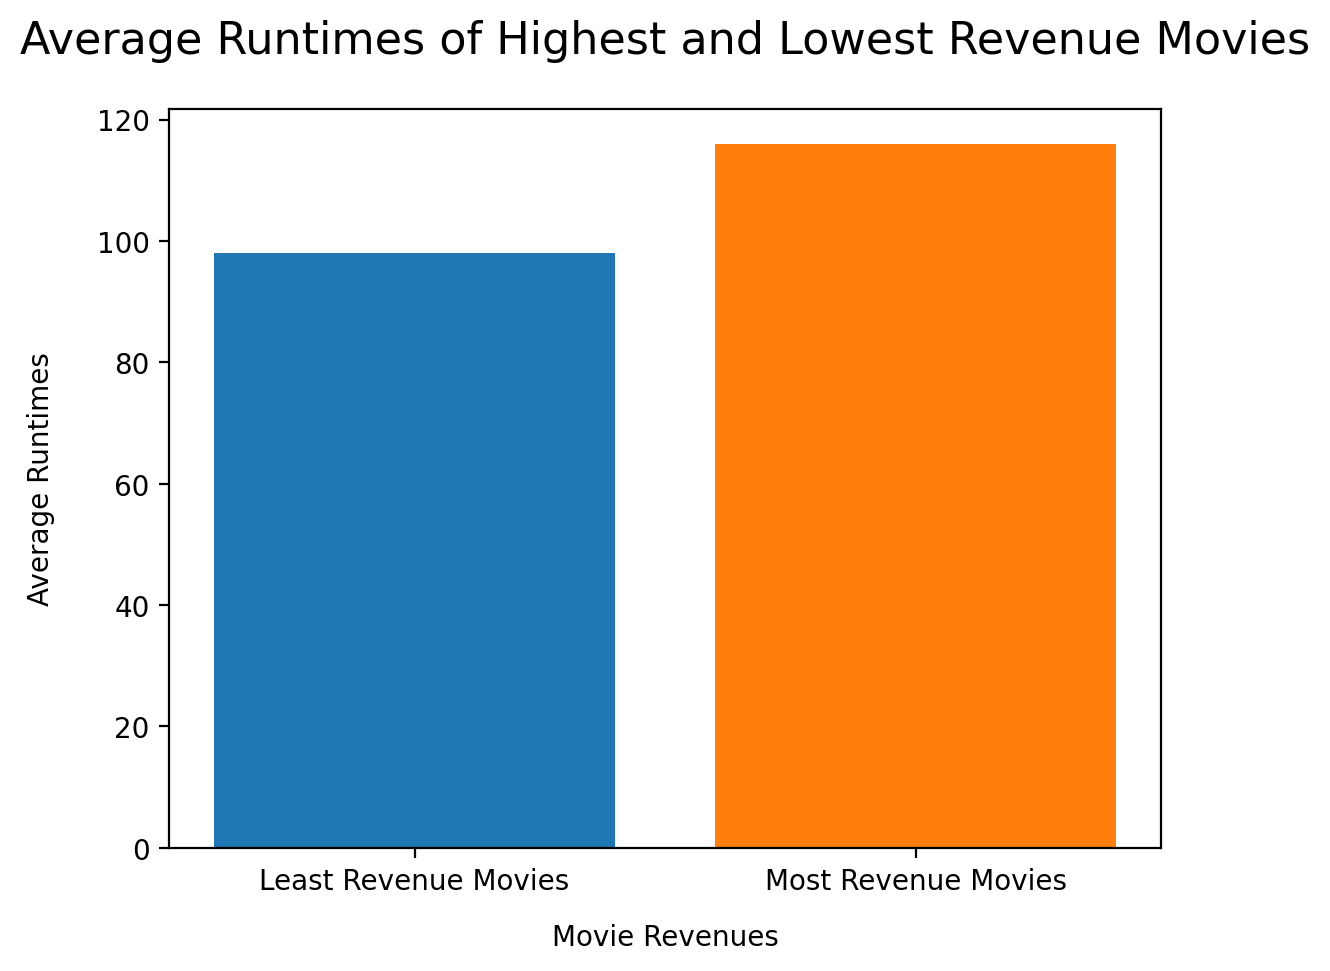

In [211]:
revenue_create_double_bar_plot("Least Revenue Movies",least_revenue_average_runtime,"Most Revenue Movies",most_revenue_average_runtime,
                       "Movie Revenues","Average Runtimes","Average Runtimes of Highest and Lowest Revenue Movies")

#### Do movies that are more popular have more or less revenue?

##### Finding the average popularities for the highest and lowest revenue movies

In [212]:
least_revenue_average_popularity =df_leastRevenue['popularity'].mean()
f'{least_revenue_average_popularity:,}'

'0.3504287460545193'

In [213]:
most_revenue_average_popularity =df_mostRevenue['popularity'].mean()
f'{most_revenue_average_popularity:,}'

'2.204850530288909'

##### Plotting the the average popularities

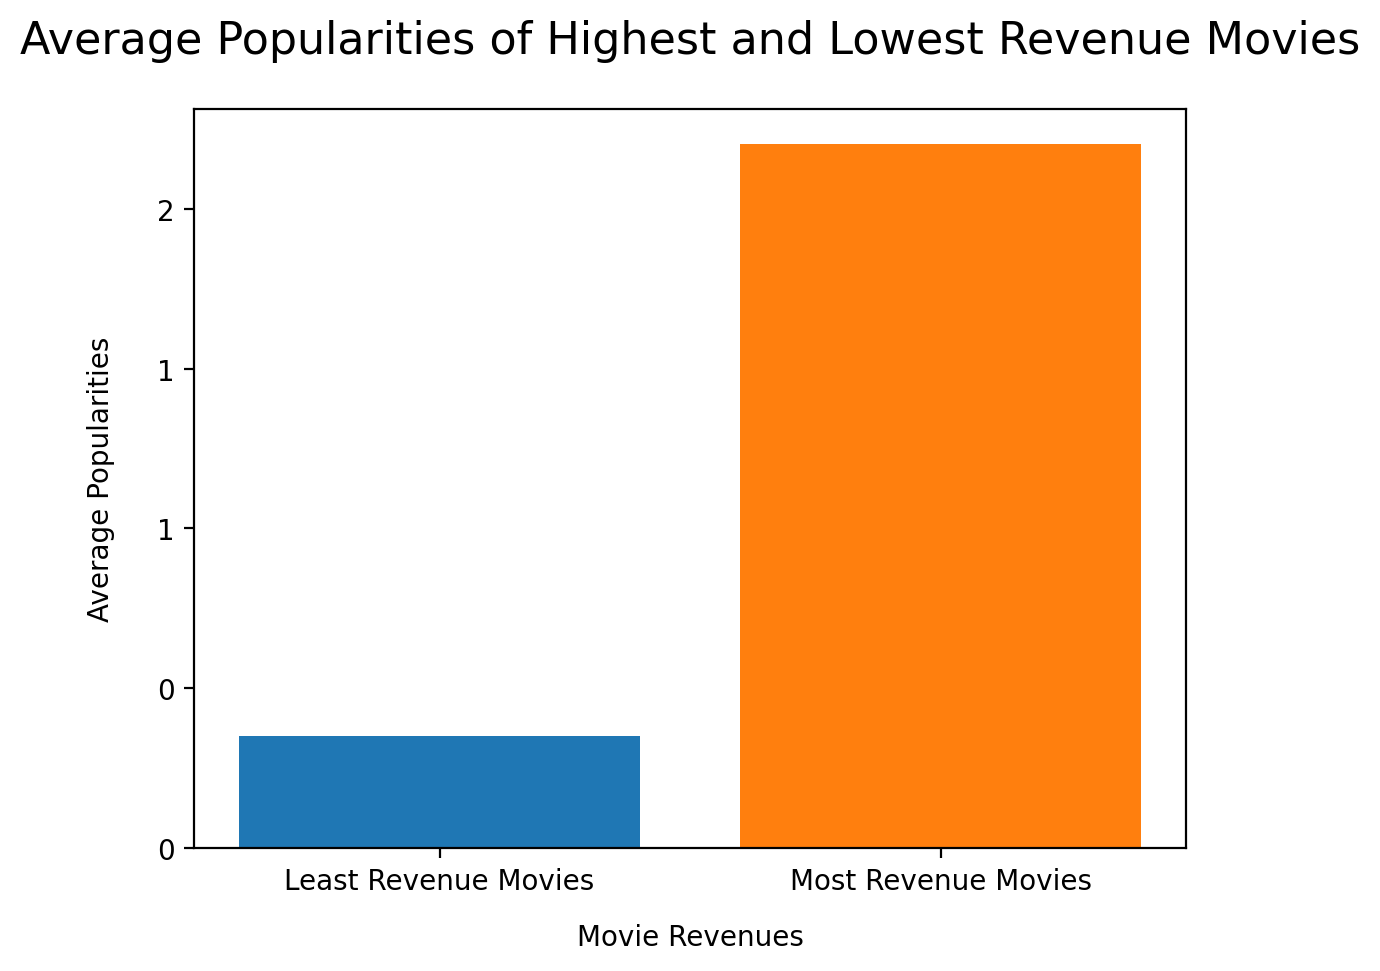

In [214]:
revenue_create_double_bar_plot("Least Revenue Movies",least_revenue_average_popularity,"Most Revenue Movies",most_revenue_average_popularity,
                       "Movie Revenues","Average Popularities","Average Popularities of Highest and Lowest Revenue Movies")

## Which directors should be hired?

### Getting an idea of who are the most experienced directors

In [215]:
df_director['director'].value_counts()

director
Woody Allen          46
Clint Eastwood       34
Martin Scorsese      30
Steven Spielberg     30
Steven Soderbergh    23
                     ..
Anthony Hemingway     1
David Guy Levy        1
Josh Schwartz         1
Sid Bennett           1
Eliot Elisofon        1
Name: count, Length: 5294, dtype: int64

### Criteria to determine the director to be hired

Some good critera would be the: `profits`, `vote_average`, `budget`, `runtime`, `popularity`. It's like asking the sub-questions:

* Which directors create movies with the most profits?
* If the goal is to create a movie that gets the highest votes, which director should be chosen?
* Which directors have the most experience working with high budgets and which with low budgets?
* Who are the directors that make the most popular short movies?

#### Which directors create movies with the most profits?

Groups the dataframe by directors, gets only the profits, sums all the profits together then sorts the values.

In [216]:
df_director_profits = df_director.groupby('director')['profits'].sum().sort_values(ascending=False)
df_director_profits

director
Steven Spielberg    7448064691
Peter Jackson       5196468949
James Cameron       5081849077
Michael Bay         3557208171
David Yates         3379295625
                       ...    
Jeremy Podeswa      -120000000
Tim Van Patten      -120000000
Graham Yost         -120000000
Uwe Boll            -161333591
Sngmoo Lee          -413912431
Name: profits, Length: 5294, dtype: int64

It seems like most directors don't tend to make a profit in their movies while some end up losing money.

In [217]:
df_director_profits.describe()

count    5.294000e+03
mean     5.786123e+07
std      2.755376e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      4.544776e+06
max      7.448065e+09
Name: profits, dtype: float64

In [218]:
df_director_profits.quantile([0.22,0.23,0.50,0.60,0.65,0.67,0.68])

0.22      -17.54
0.23        0.00
0.50        0.00
0.60        0.00
0.65        0.00
0.67     1309.38
0.68    18852.24
Name: profits, dtype: float64

It seems that only 33% of directors make a profit, 45% don't make any profit and 22% lose money on their movies.

##### Plots of directors and profits

###### Distribution of director profits. as it can be seen, most directors did not make much money off of their movies.

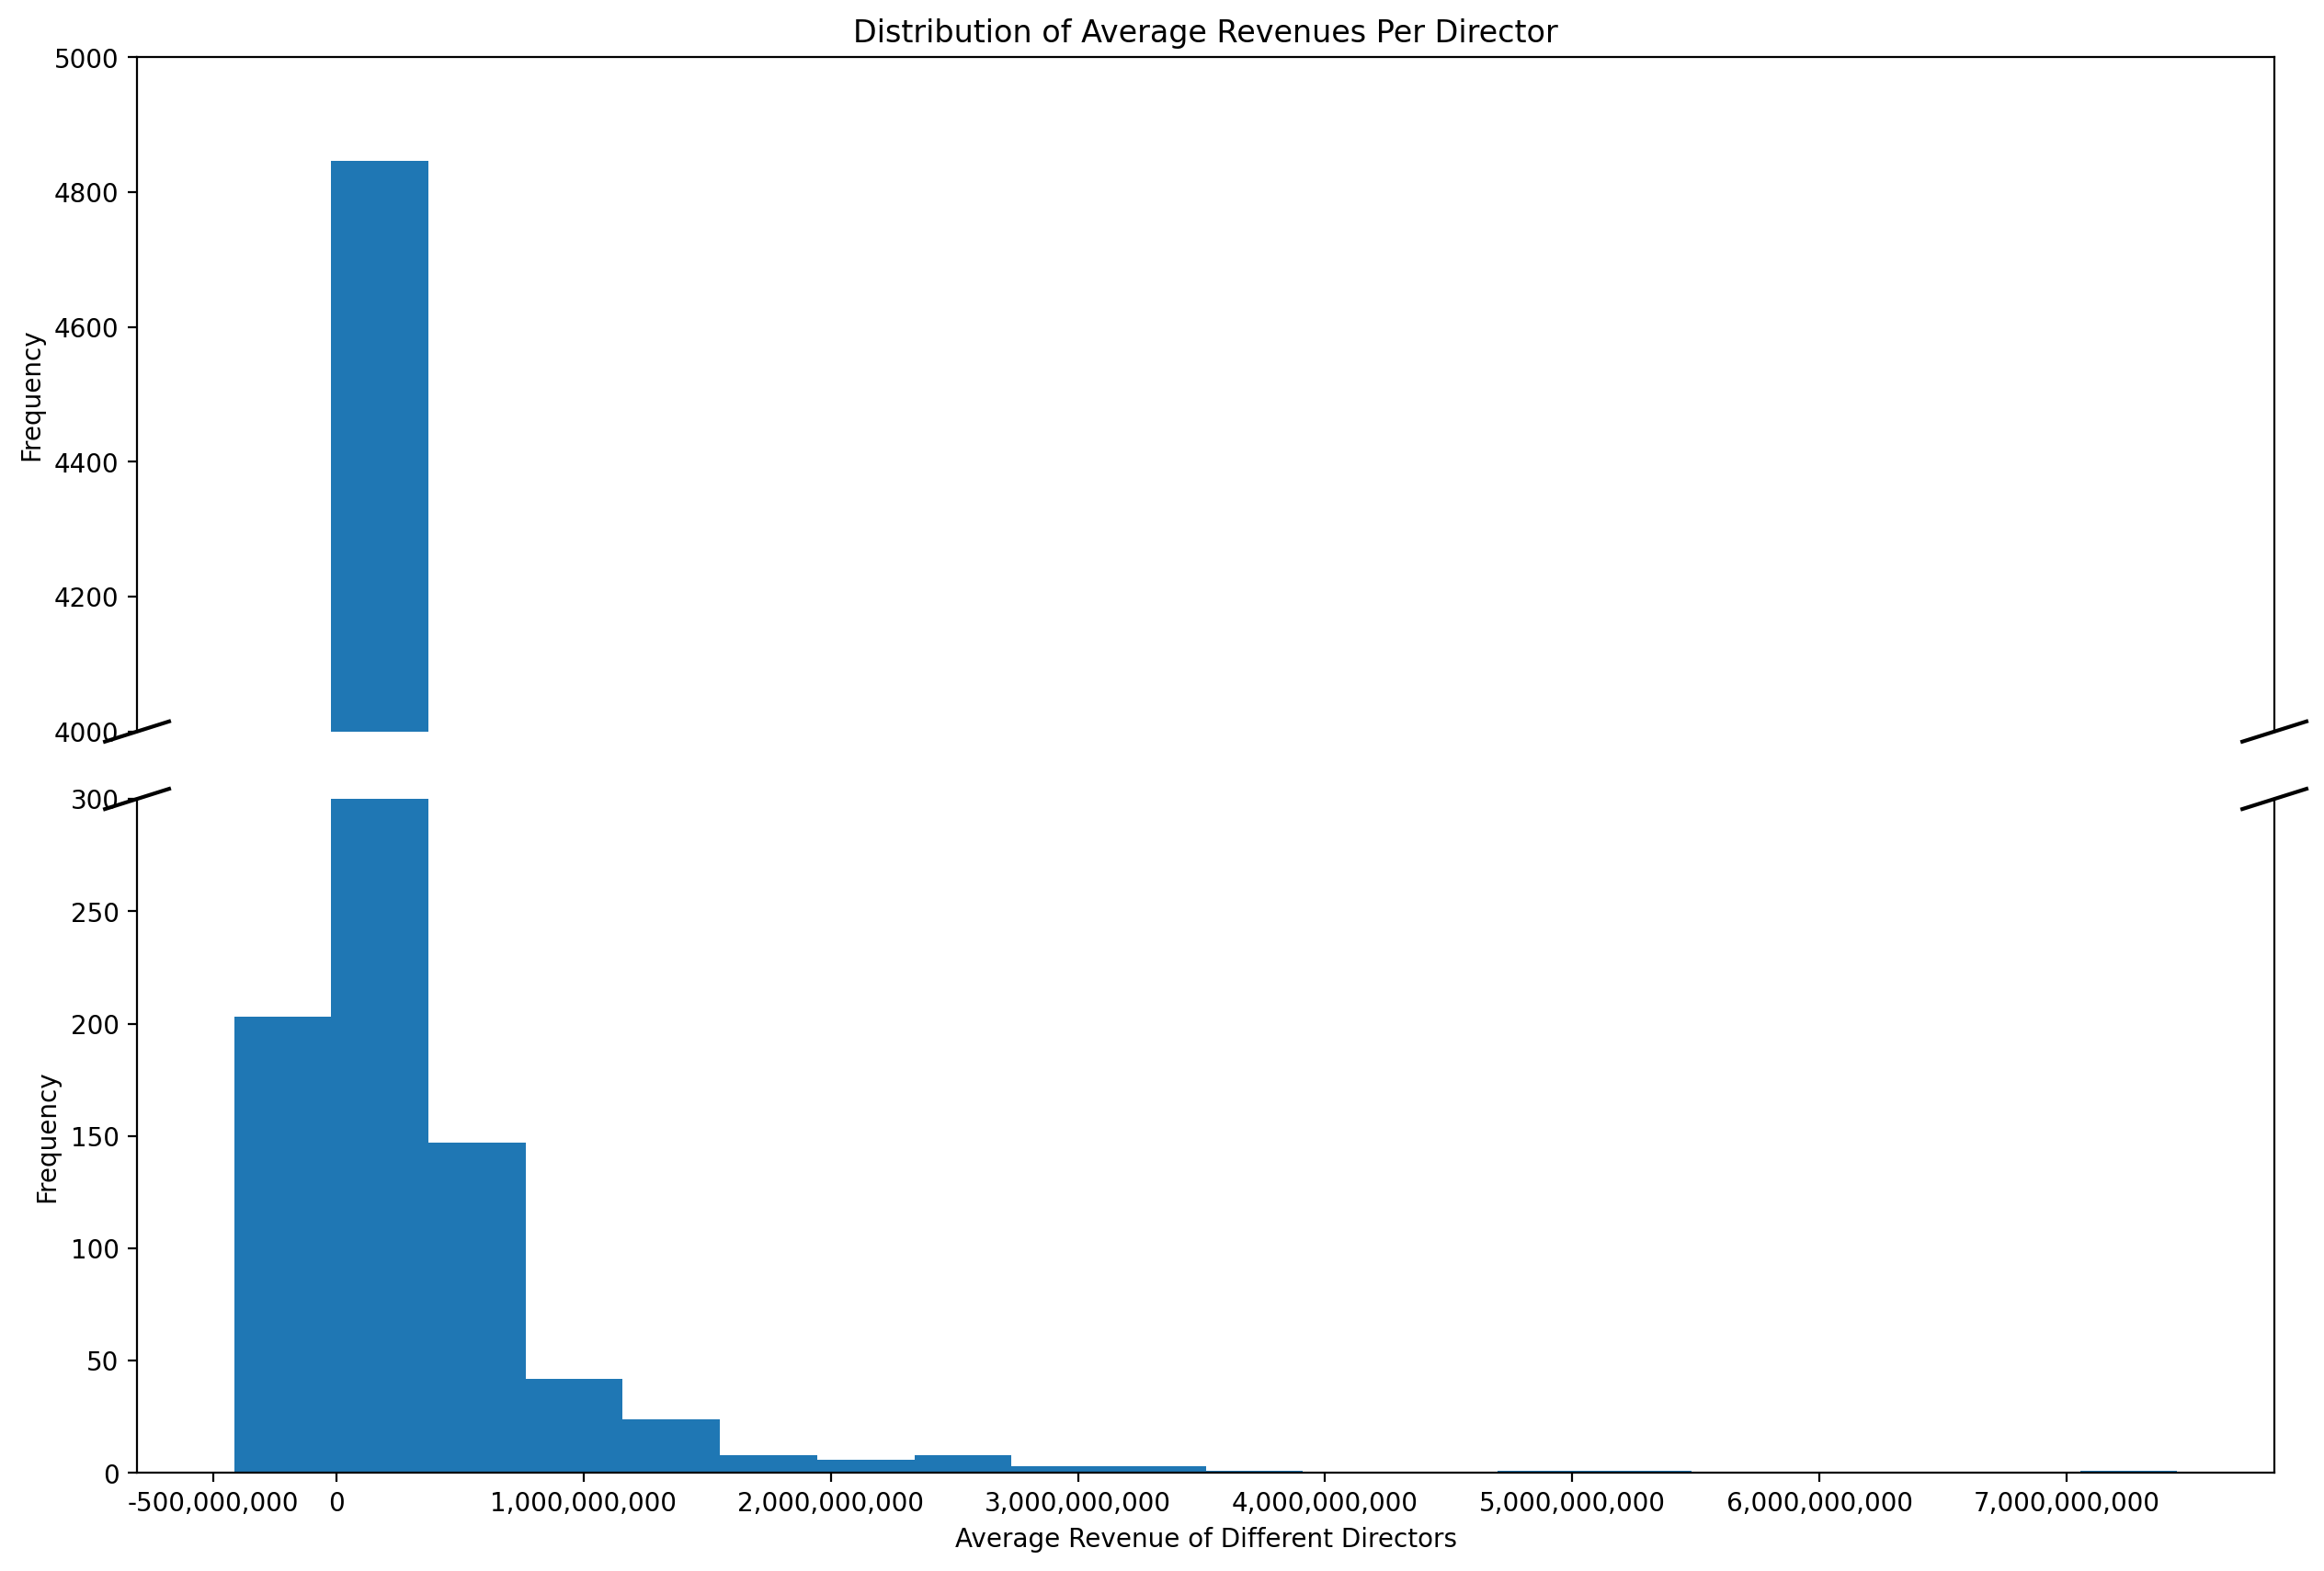

In [219]:
#This special plot designed was used to skip some values on the y-axis

f, axis = plt.subplots(2, 1, sharex=True)

df_director_profits.plot(kind='hist', ax=axis[0],bins=20)
df_director_profits.plot(kind='hist', ax=axis[1],bins=20)

axis[0].set_ylim(4000, 5000)

axis[1].set_ylim(0, 300)
axis[1].legend().set_visible(False)

axis[1].set_xlabel("Average Revenue of Different Directors")


axis[0].title.set_text('Distribution of Average Revenues Per Director')
axis[0].xaxis.set_visible(False)

ticks = range(0,8000000000,1000000000)
ticks = list(ticks)
ticks.insert(0,-500000000)
axis[0].set_xticks(ticks, minor=False)

f.set_figheight(10)
f.set_figwidth(15)

axis[0].get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .015



kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

f.subplots_adjust(hspace=0.1)
plt.show()

###### The top 10 directors who make the most profits

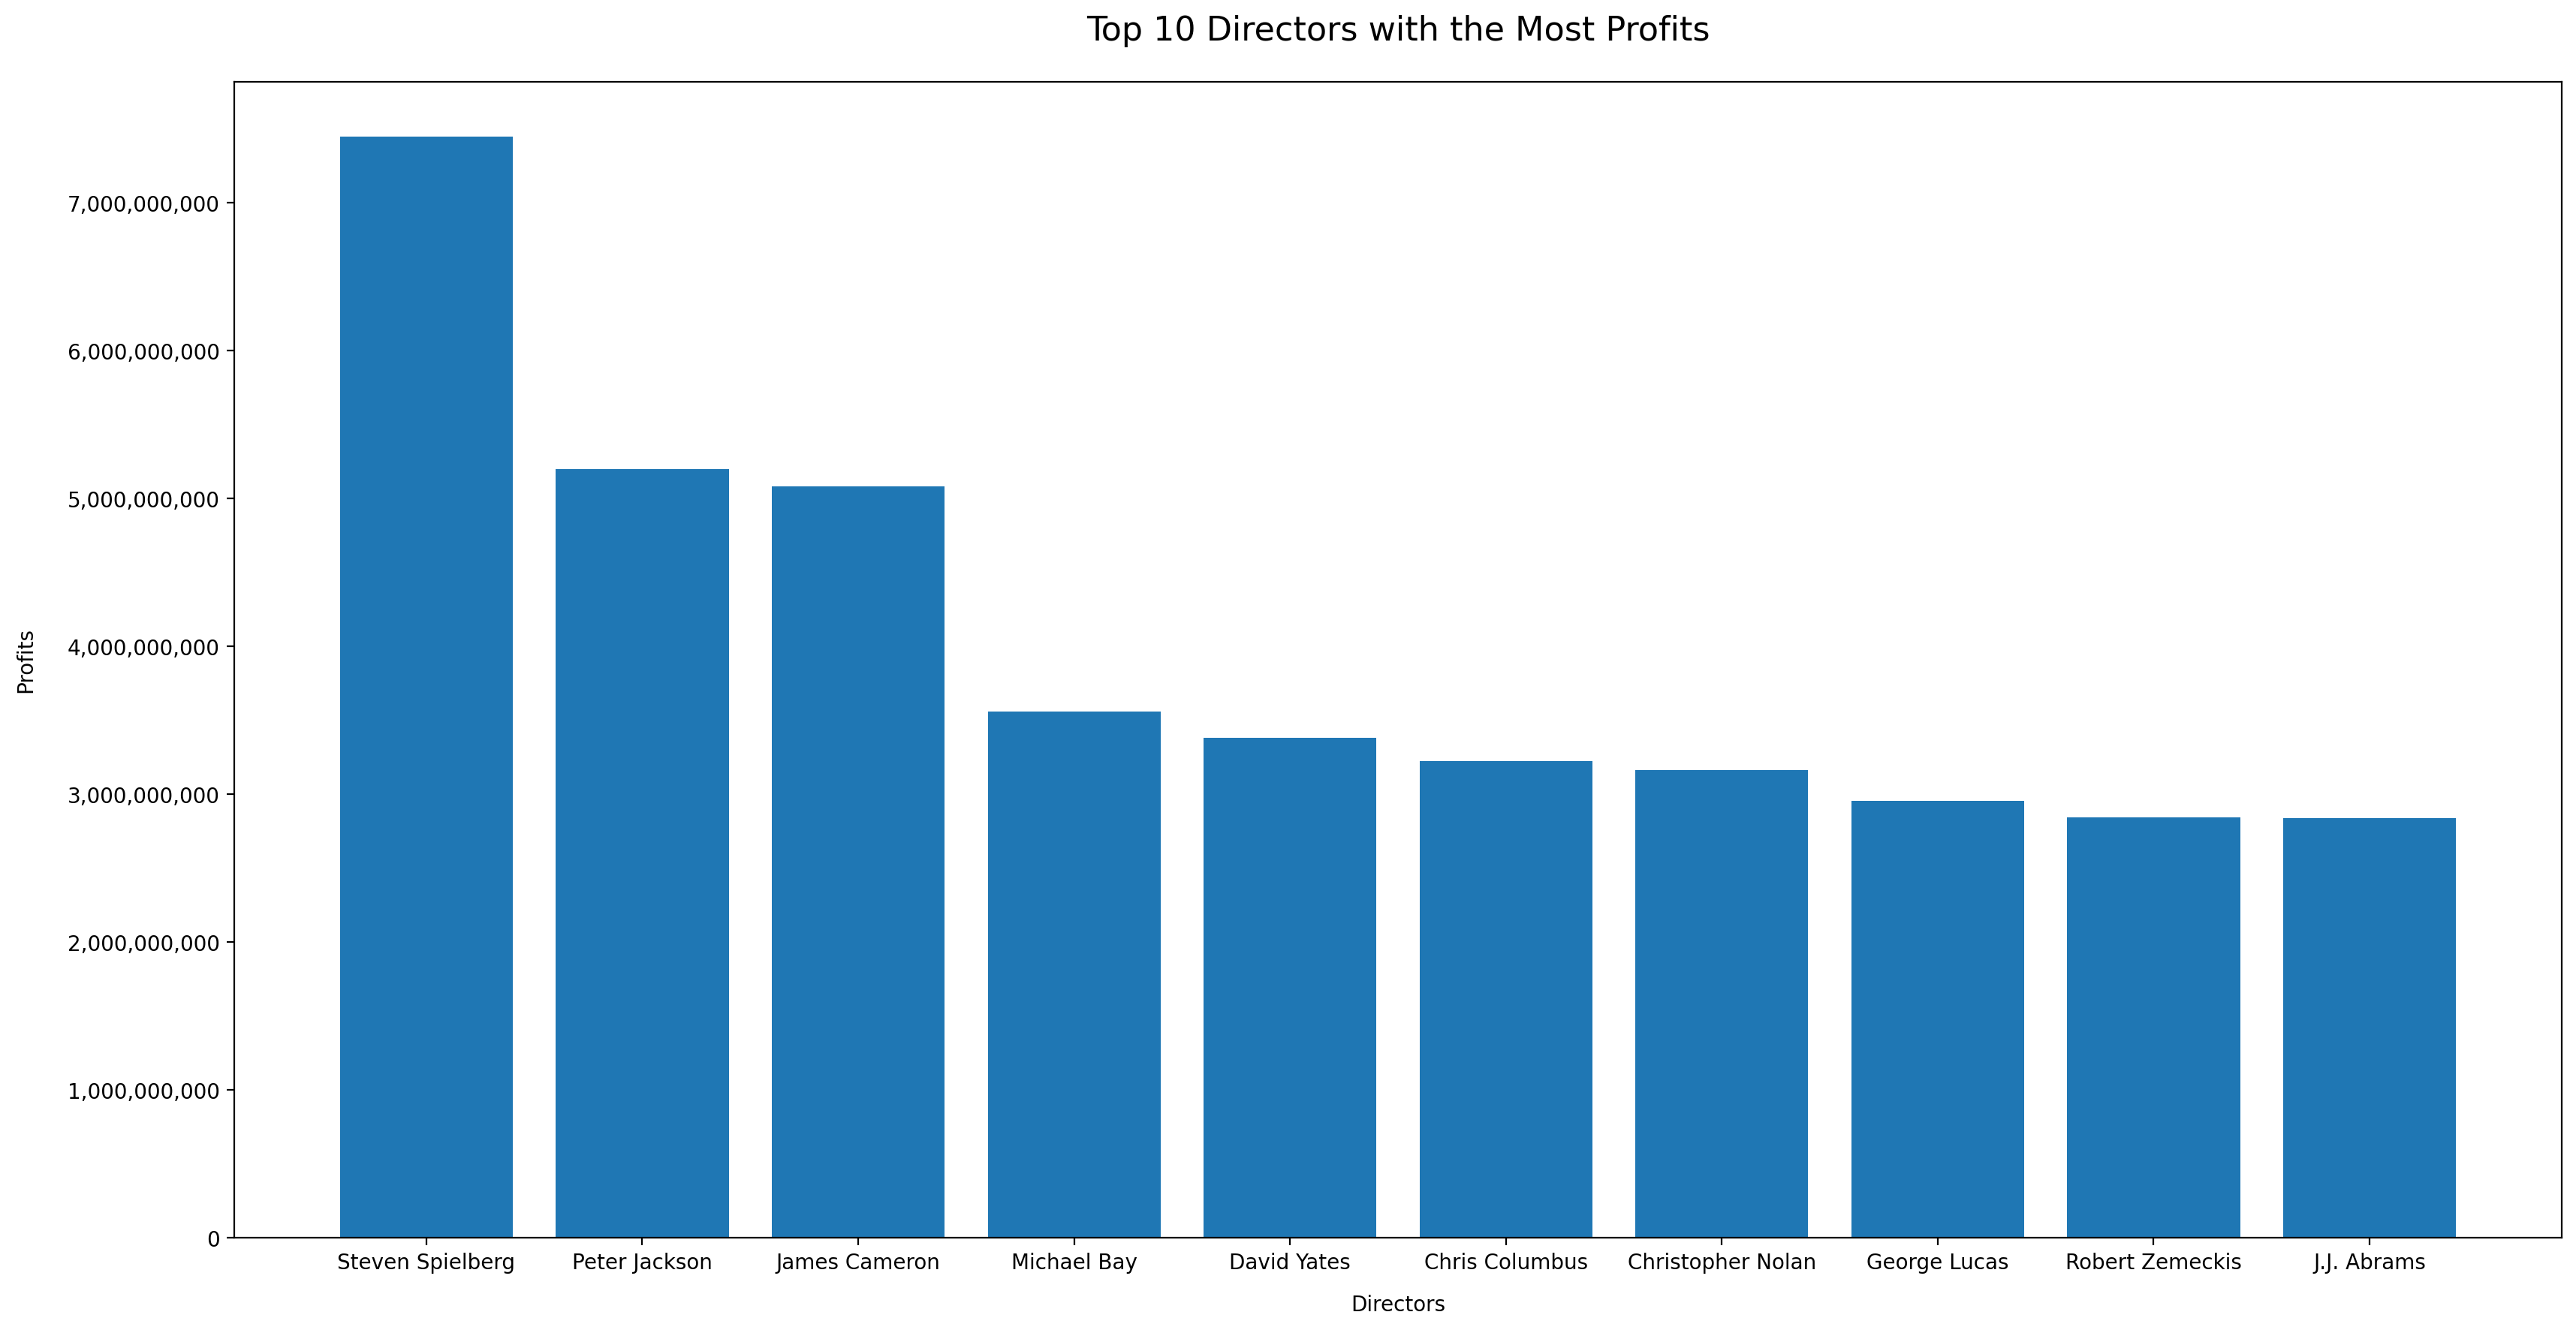

In [220]:
plt.figure(figsize=(20,10))
plt.bar(df_director_profits[:10].index, df_director_profits[:10])

plt.xlabel("Directors",labelpad=10)
plt.ylabel("Profits",labelpad=15)
plt.title("Top 10 Directors with the Most Profits",pad=20,fontsize = 16)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

###### The bottom 10 directors who make the least profits.

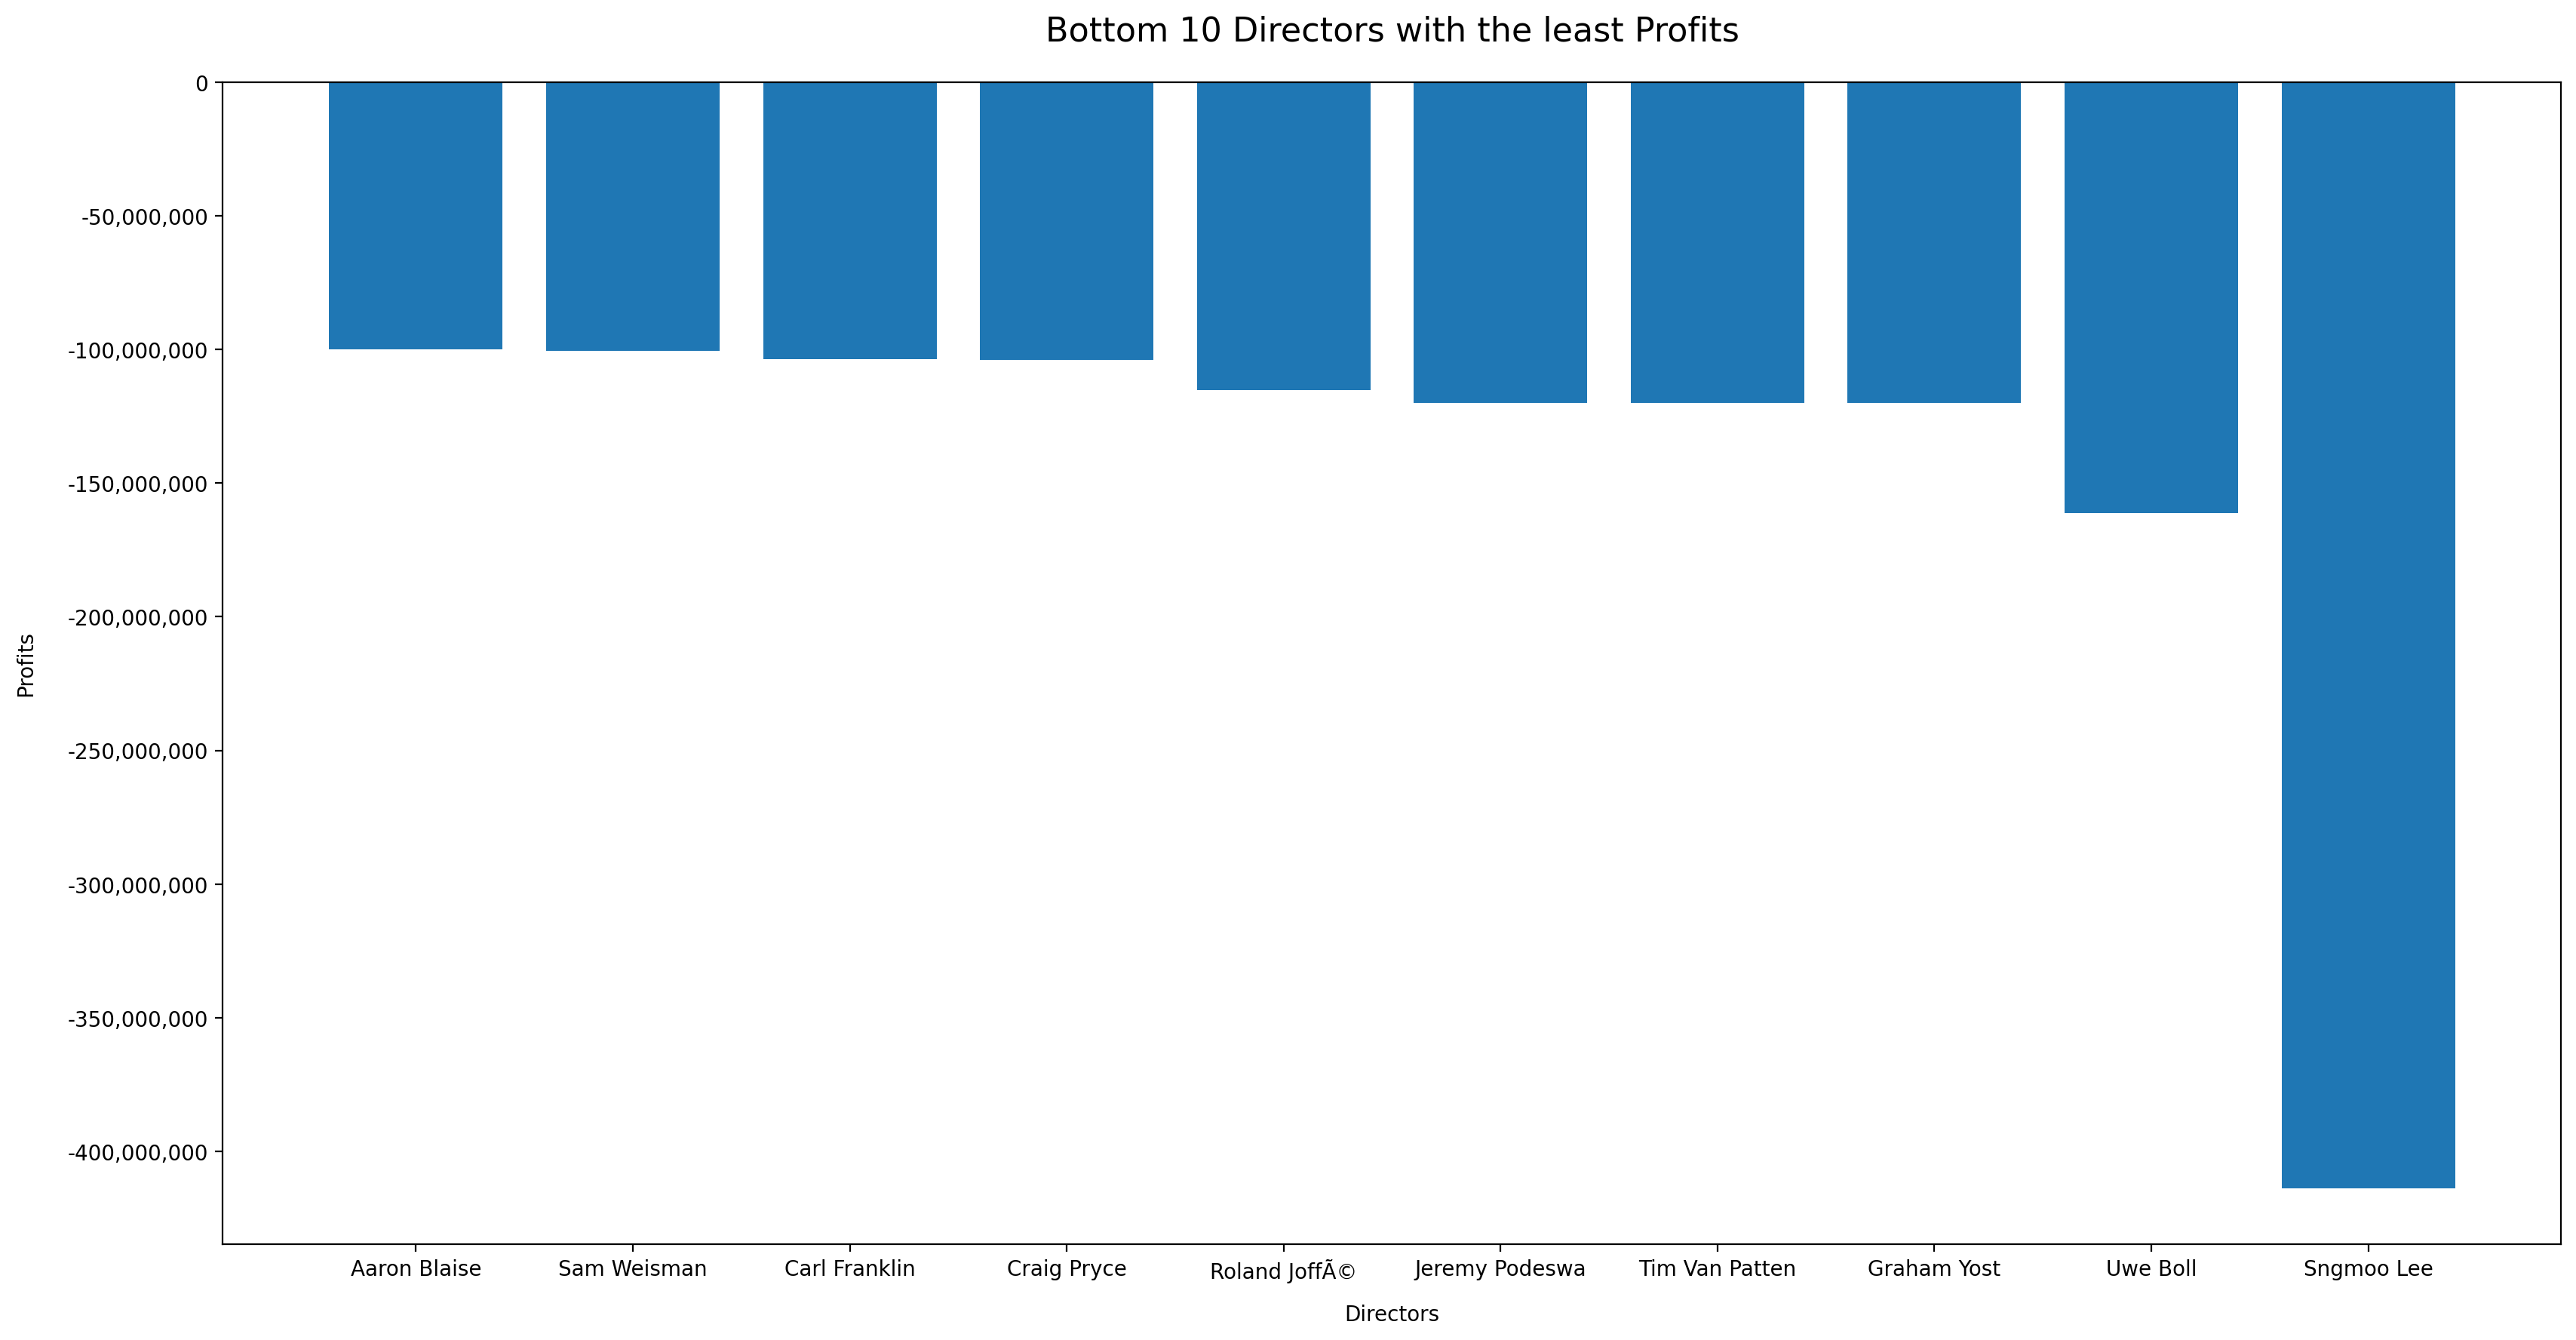

In [221]:
plt.figure(figsize=(20,10))
plt.bar(df_director_profits[-10:].index, df_director_profits[-10:])

plt.xlabel("Directors",labelpad=10)
plt.ylabel("Profits",labelpad=15)
plt.title("Bottom 10 Directors with the least Profits",pad=20,fontsize = 16)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

#### If the goal is to create a movie that gets the highest votes, which director should be chosen?

##### Grouping directors by the average `vote_average`

In [222]:
df_directorVotes = df_director.groupby('director')['vote_average'].mean().sort_values(ascending=False)
df_directorVotes

director
Mark Cousins            9.2
David Mallet            8.7
Curt Morgan             8.5
Michael Henry Wilson    8.5
Saul Swimmer            8.5
                       ... 
Lawrence Kasanoff       2.2
Justin Russell          2.2
James Nguyen            2.1
Brett Kelly             2.0
Harold P. Warren        1.5
Name: vote_average, Length: 5294, dtype: float64

##### Getting an idea of the voting distribution

In [223]:
df_directorVotes.describe()

count    5294.000000
mean        5.886748
std         0.917815
min         1.500000
25%         5.350000
50%         5.950000
75%         6.500000
max         9.200000
Name: vote_average, dtype: float64

Most directors tend to get less than a 6 vote average

##### Distribution of average `vote_averages` per director

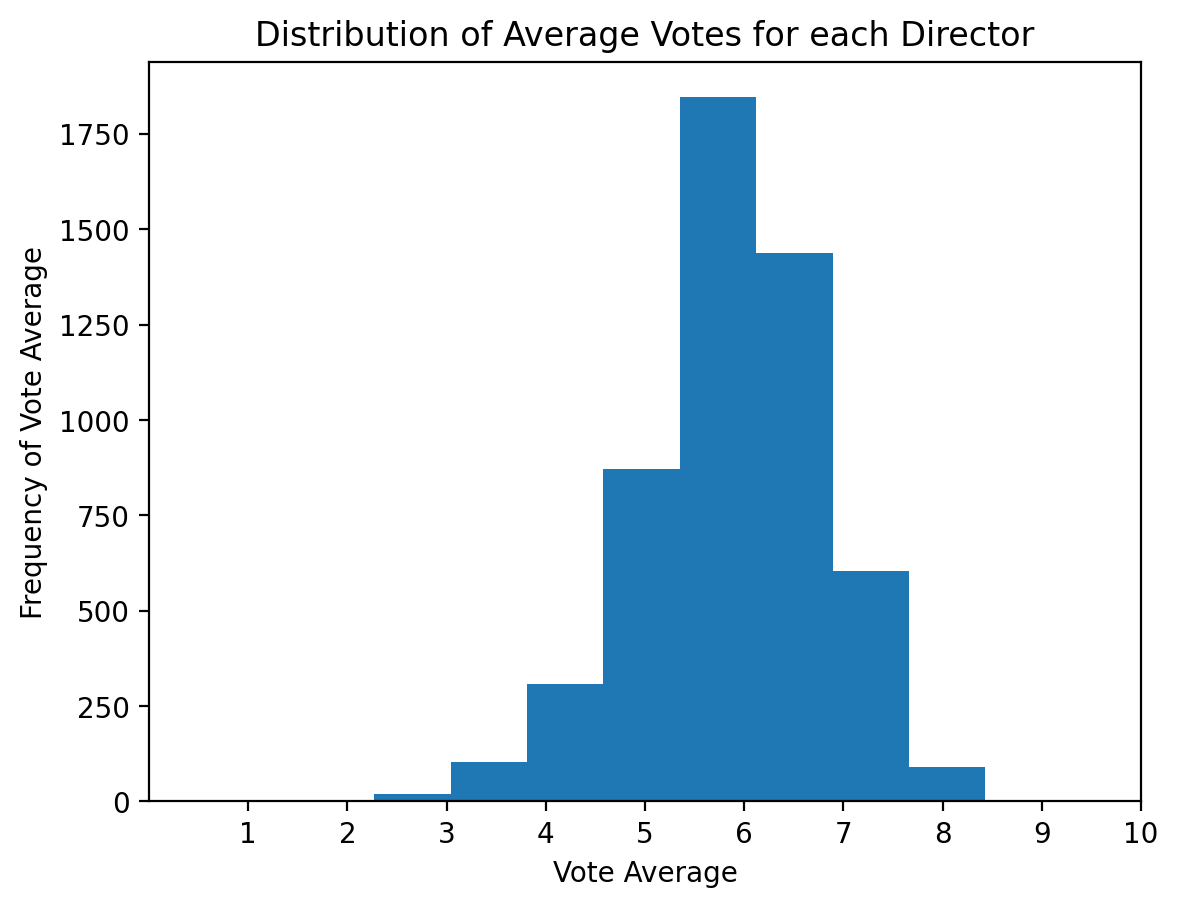

In [224]:
plt.hist(df_directorVotes,bins=10)
plt.xlim([0,10])
plt.xlabel("Vote Average")
plt.ylabel("Frequency of Vote Average")
plt.title("Distribution of Average Votes for each Director")
plt.xticks(list(range(1,11,1)))
plt.show()

##### The directors with the best vote average

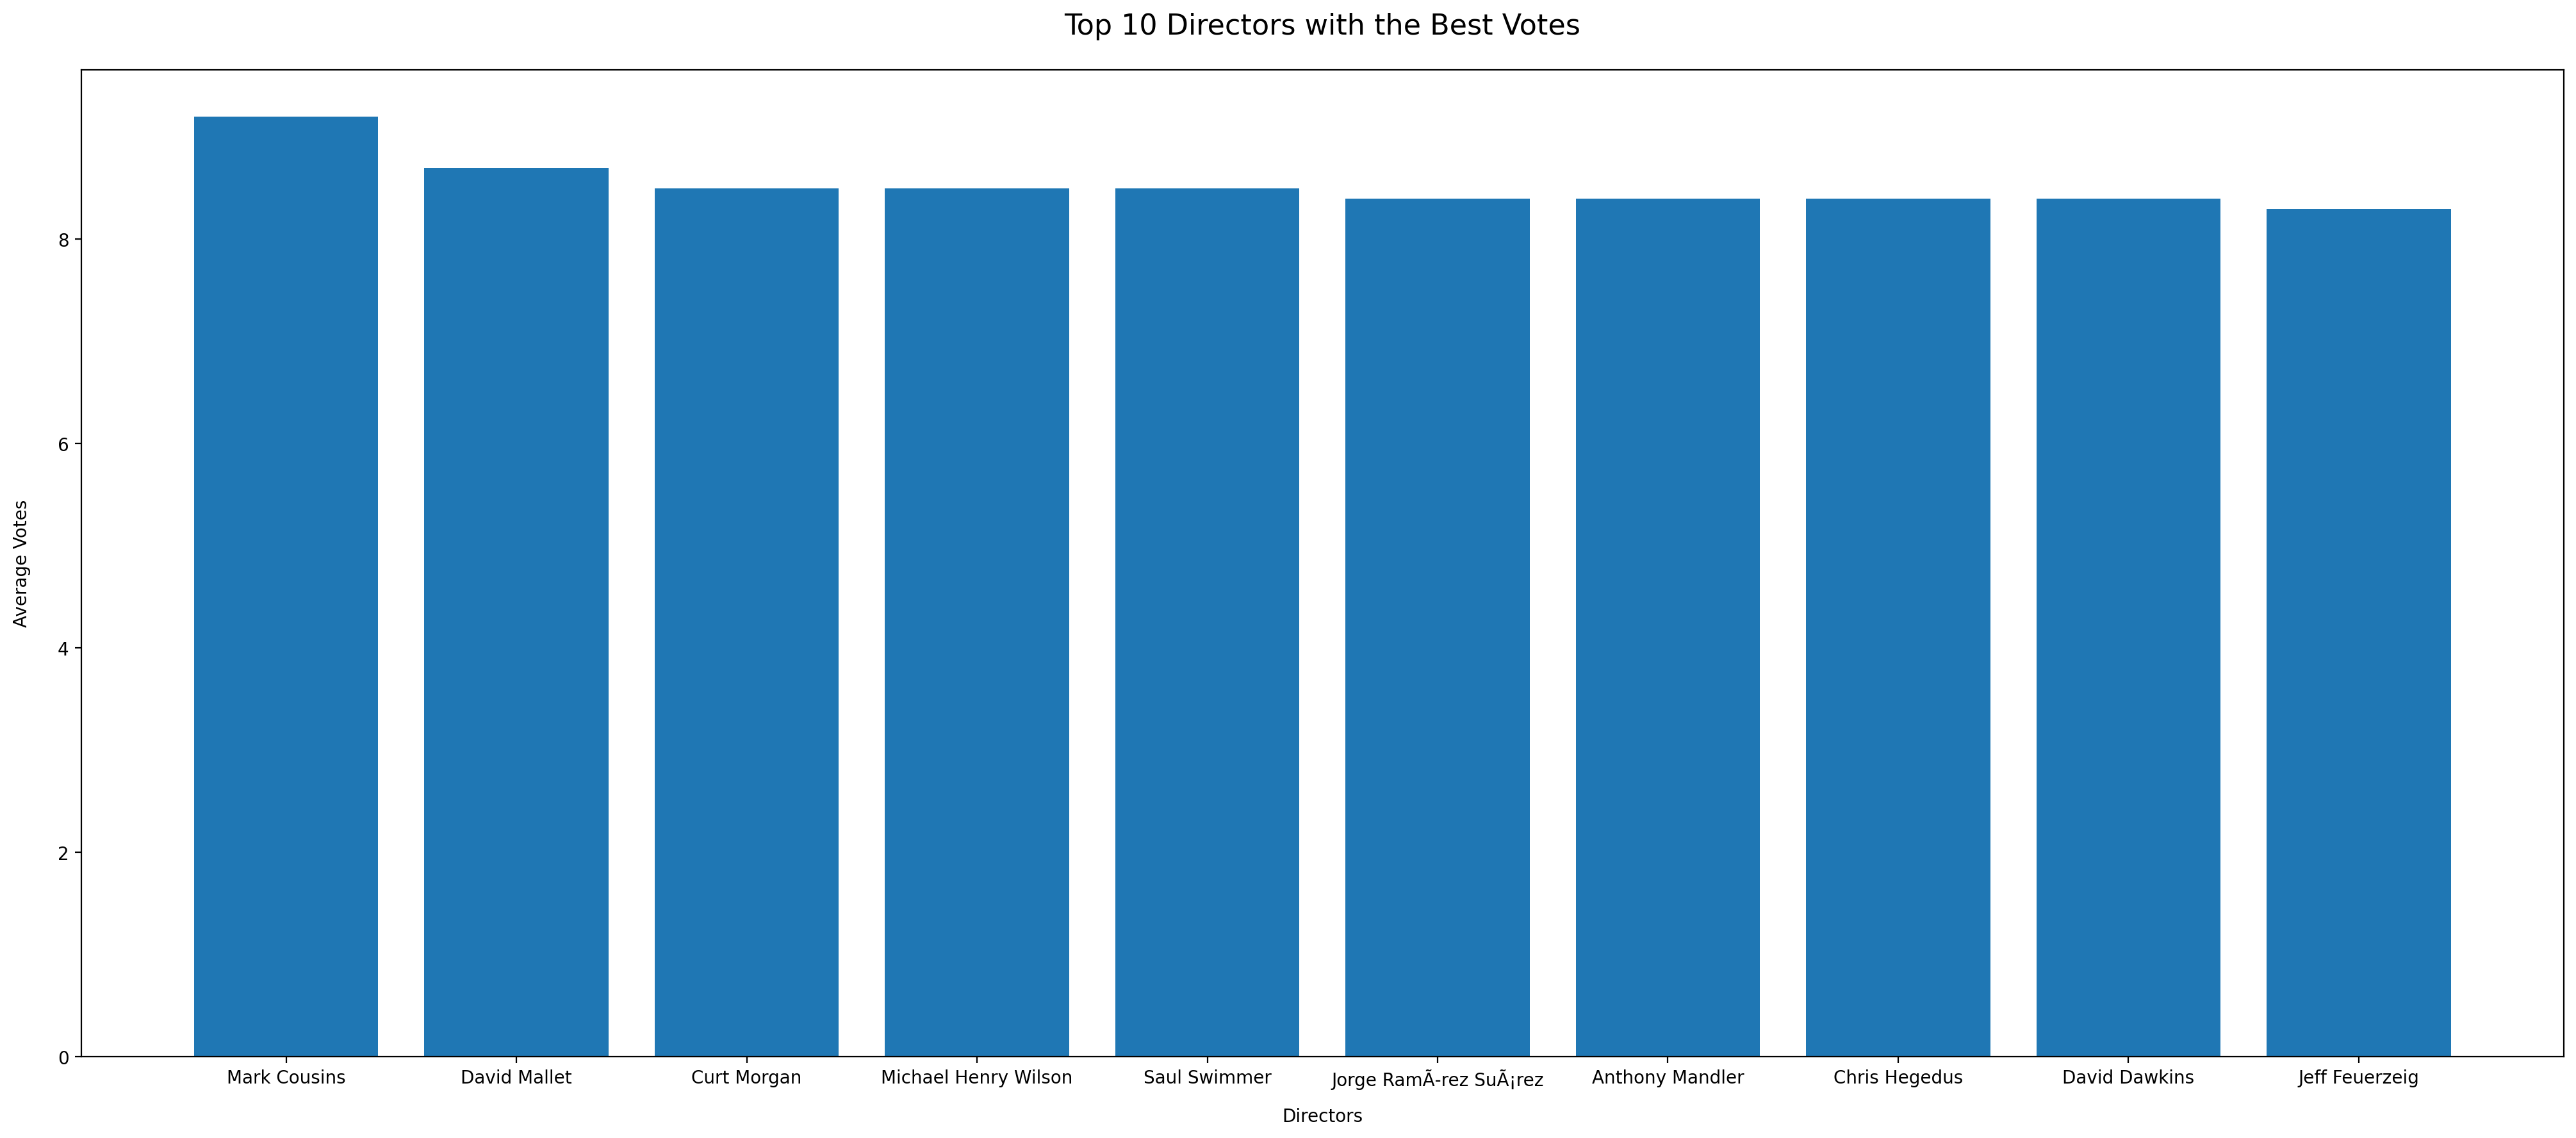

In [225]:
plt.figure(figsize=(25,10))
plt.bar(df_directorVotes[:10].index, df_directorVotes[:10])

plt.xlabel("Directors",labelpad=10)
plt.ylabel("Average Votes",labelpad=15)
plt.title("Top 10 Directors with the Best Votes",pad=20,fontsize = 16)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

##### The Directors with the worst vote average

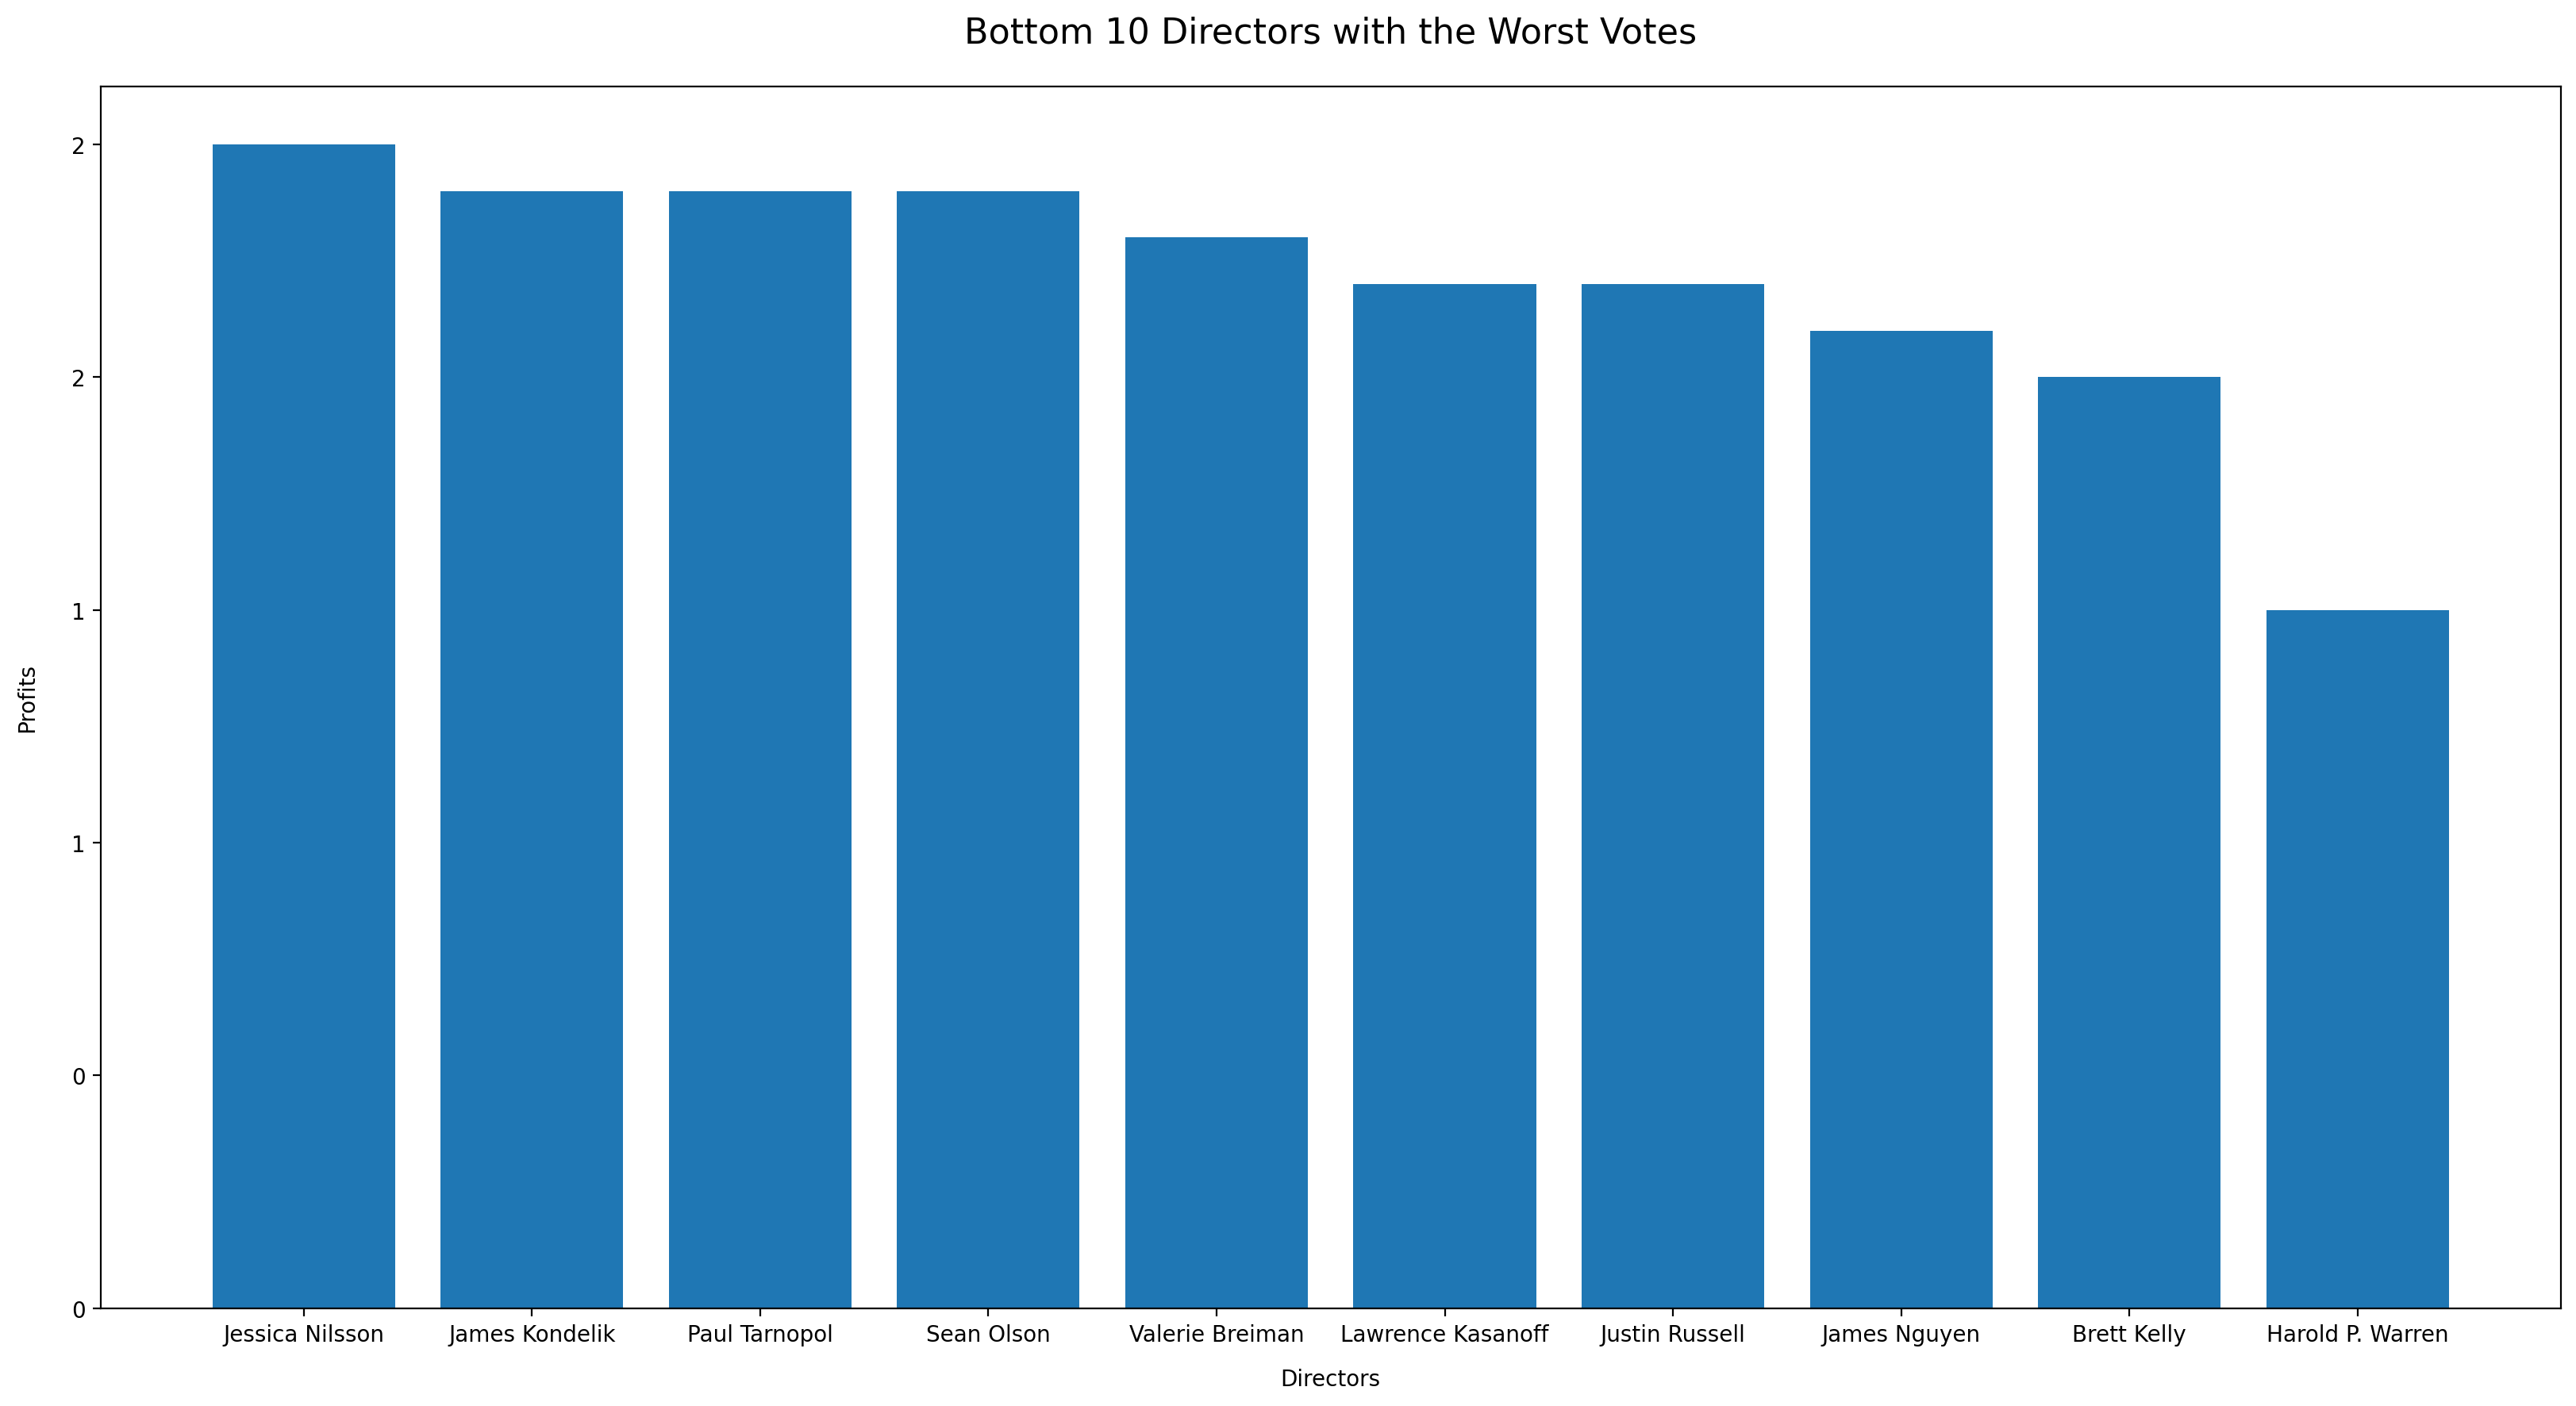

In [226]:
plt.figure(figsize=(20,10))
plt.bar(df_directorVotes[-10:].index, df_directorVotes[-10:])

plt.xlabel("Directors",labelpad=10)
plt.ylabel("Profits",labelpad=15)
plt.title("Bottom 10 Directors with the Worst Votes",pad=20,fontsize = 16)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

#### Which directors have the most experience working with high budgets and which with low budgets?

##### Grouping the directors based on their average movie budget and sorting it.

In [227]:
df_directorBudgets = df_director.groupby('director')['budget'].mean().sort_values(ascending=False)
df_directorBudgets

director
Sngmoo Lee          425000000.0
Brad Lewis          200000000.0
Mark Andrews        185000000.0
Robert Stromberg    180000000.0
Bob Peterson        175000000.0
                       ...     
Jeff Howlett                0.0
Jeff Kanew                  0.0
Jeff Lau                    0.0
Jeff Lieberman              0.0
Ã€lex Pastor                0.0
Name: budget, Length: 5294, dtype: float64

##### Basic information about director budgets

In [228]:
df_directorBudgets.describe()

count    5.294000e+03
mean     8.627494e+06
std      2.065314e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.600000e+06
max      4.250000e+08
Name: budget, dtype: float64

It seems like most directors have a budget of 0

##### How many directors have worked on a movie with a budget of 0?

In [229]:
len(df_directorBudgets[df_directorBudgets==0])

2797

2797 directors have worked on movies with a budget of 0 

In [230]:
df[df['budget']==0]['director'].duplicated().sum()

1891

2233 directors have worked on 2 or more movies with a zero budget

##### Who are the directors who have worked on the most movies with a budget of 0?

Since almost half of the directors seem to work with a budget of 0, who are the ones that are most experienced at working on movies without a budget?

In [231]:
df_director_budget_zero = df[df['budget']==0]['director'].value_counts()
df_director_budget_zero

director
Woody Allen                    20
Gerald Thomas                  12
Tyler Perry                    11
Norman Jewison                 11
Sidney Lumet                   11
                               ..
Sally George|Stephen Walker     1
Tatia Rosenthal                 1
Chris Moore                     1
Mike Nawrocki                   1
Vidhu Vinod Chopra              1
Name: count, Length: 3681, dtype: int64

These are the directors who have worked on the most movies with a budget of 0

##### Plot of distribution of budgets

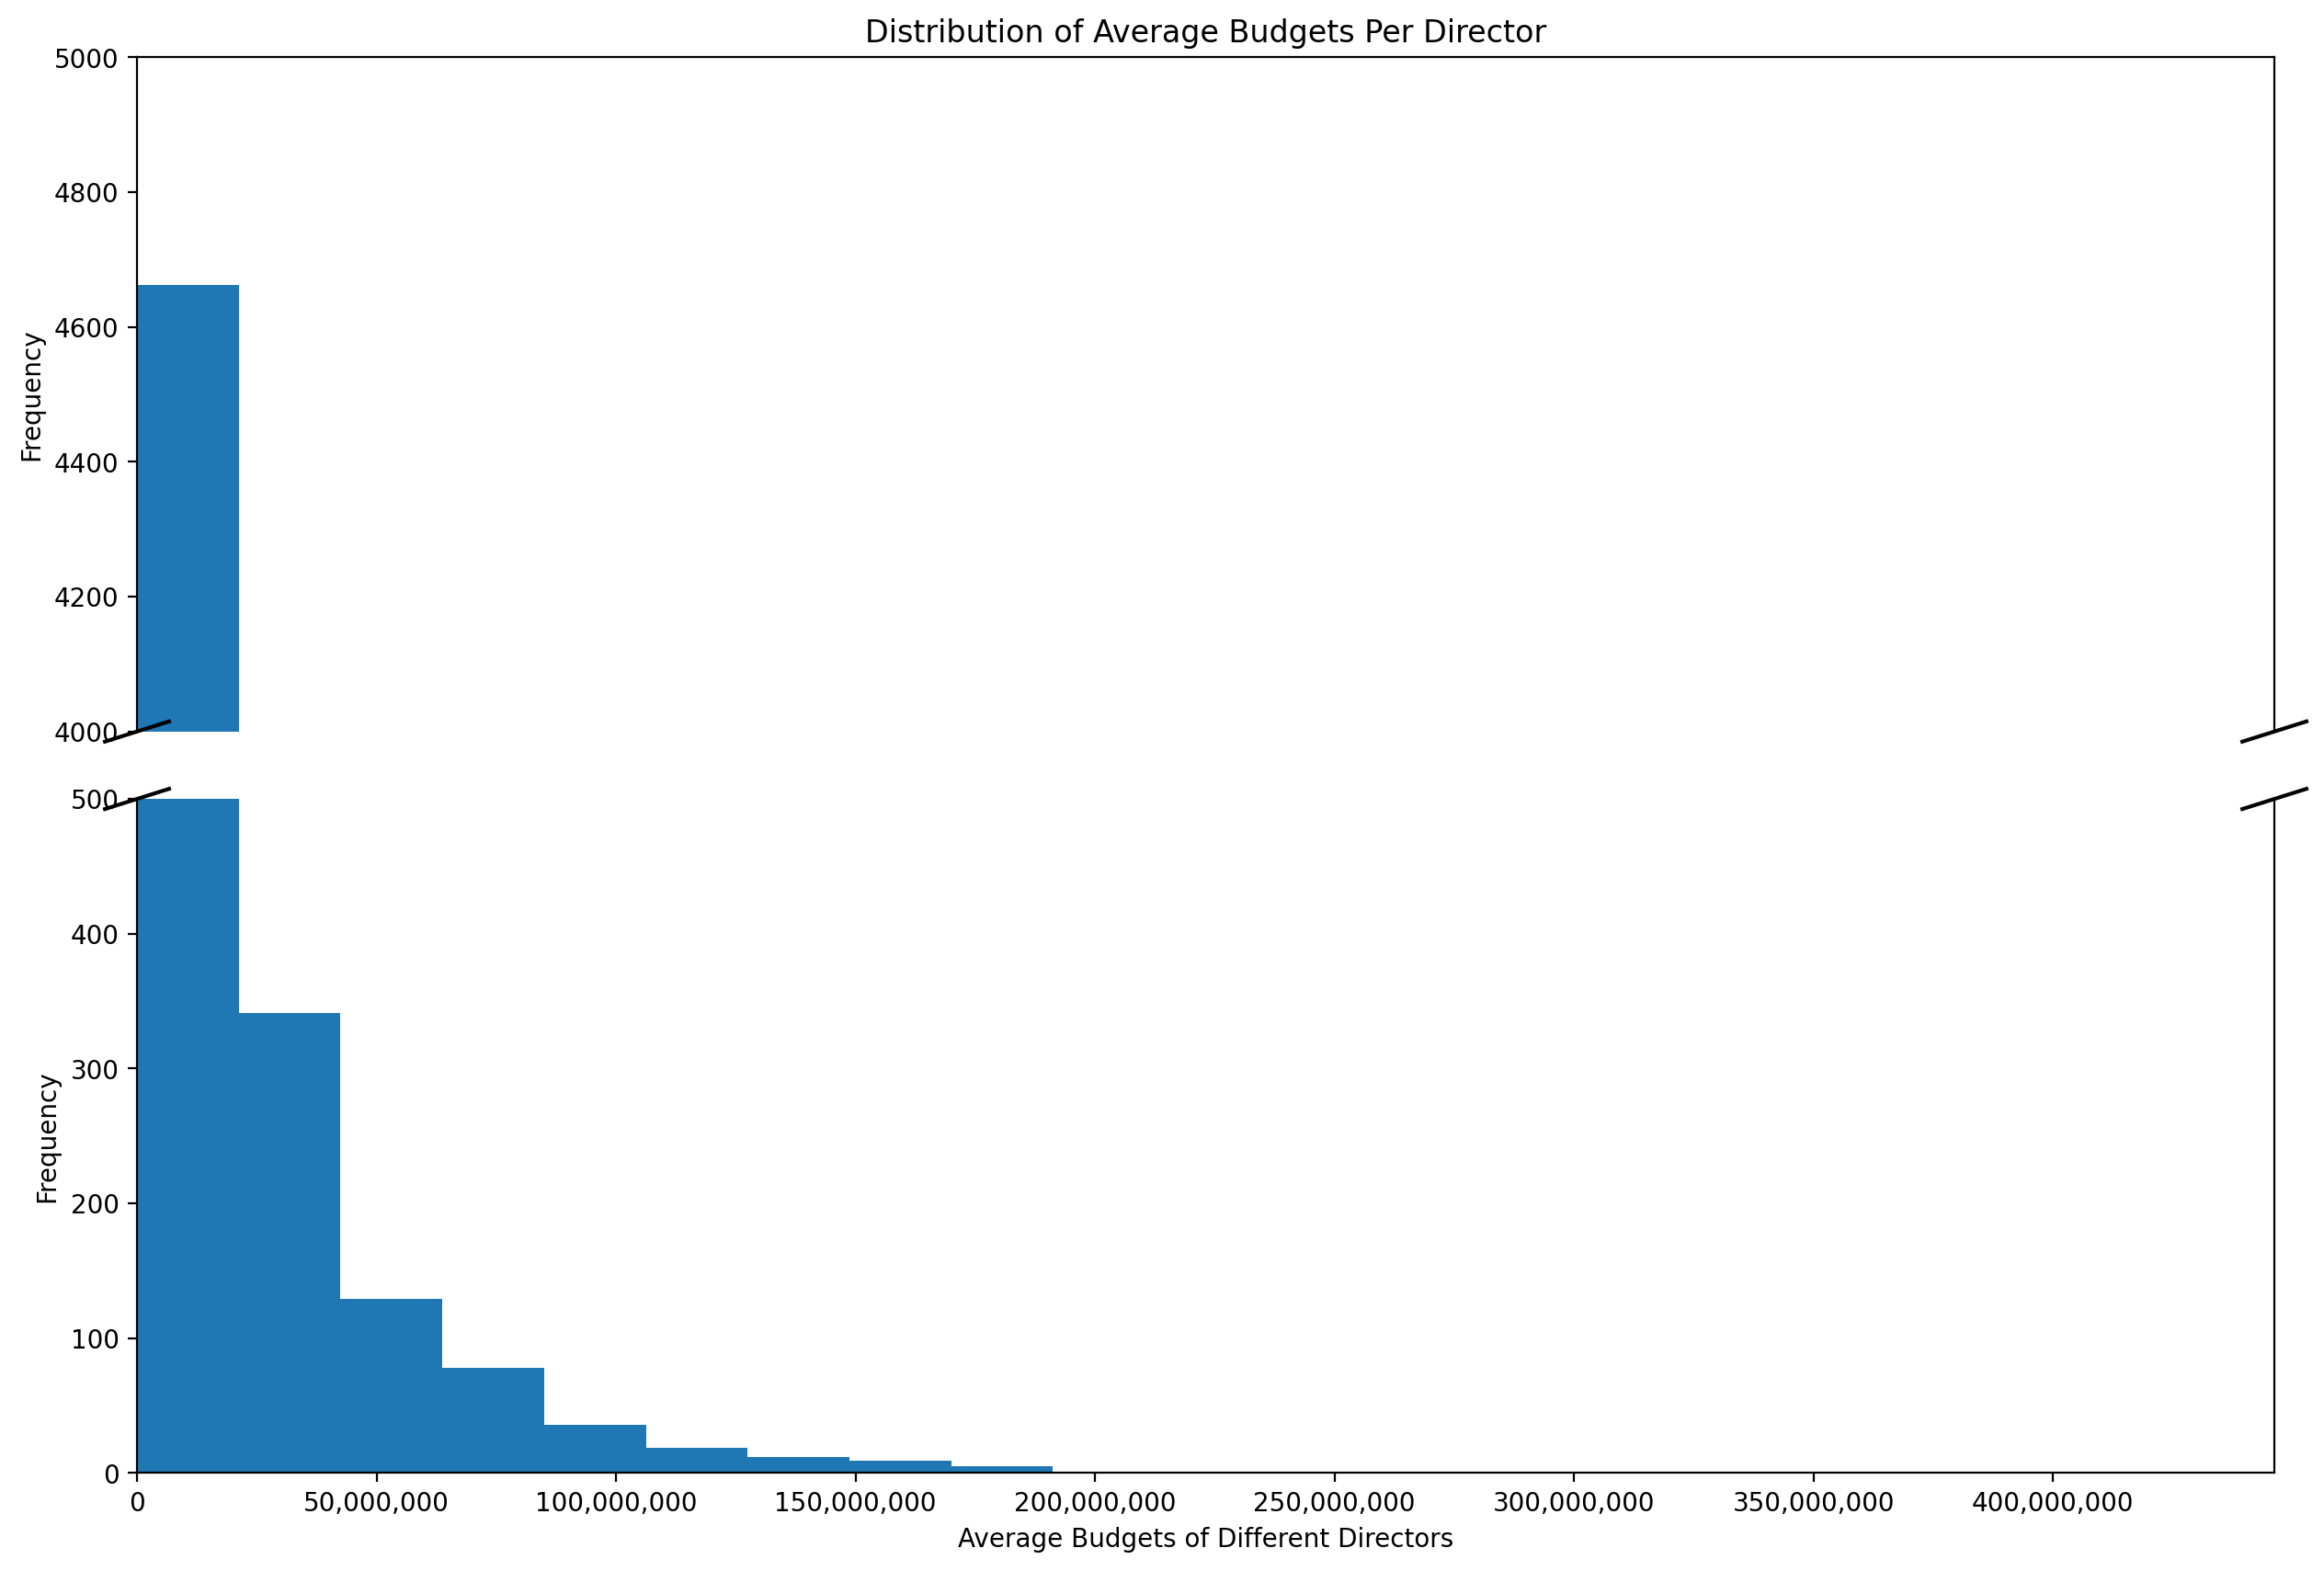

In [232]:
f, axis = plt.subplots(2, 1, sharex=True)

df_directorBudgets.plot(kind='hist', ax=axis[0],bins=20)
df_directorBudgets.plot(kind='hist', ax=axis[1],bins=20)

axis[0].set_ylim(4000, 5000)

axis[1].set_ylim(0, 500)
axis[1].legend().set_visible(False)

axis[1].set_xlabel("Average Budgets of Different Directors")


axis[0].title.set_text('Distribution of Average Budgets Per Director')
axis[0].xaxis.set_visible(False)



axis[0].set_xlim(0)

f.set_figheight(10)
f.set_figwidth(15)

axis[0].get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .015

kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

f.subplots_adjust(hspace=0.1)
plt.show()

It seems like most directors have worked with a budget of less than 100,000,000.

##### Directors who have worked with the highest budgets

Top 10 directors who have worked with the highest budgets

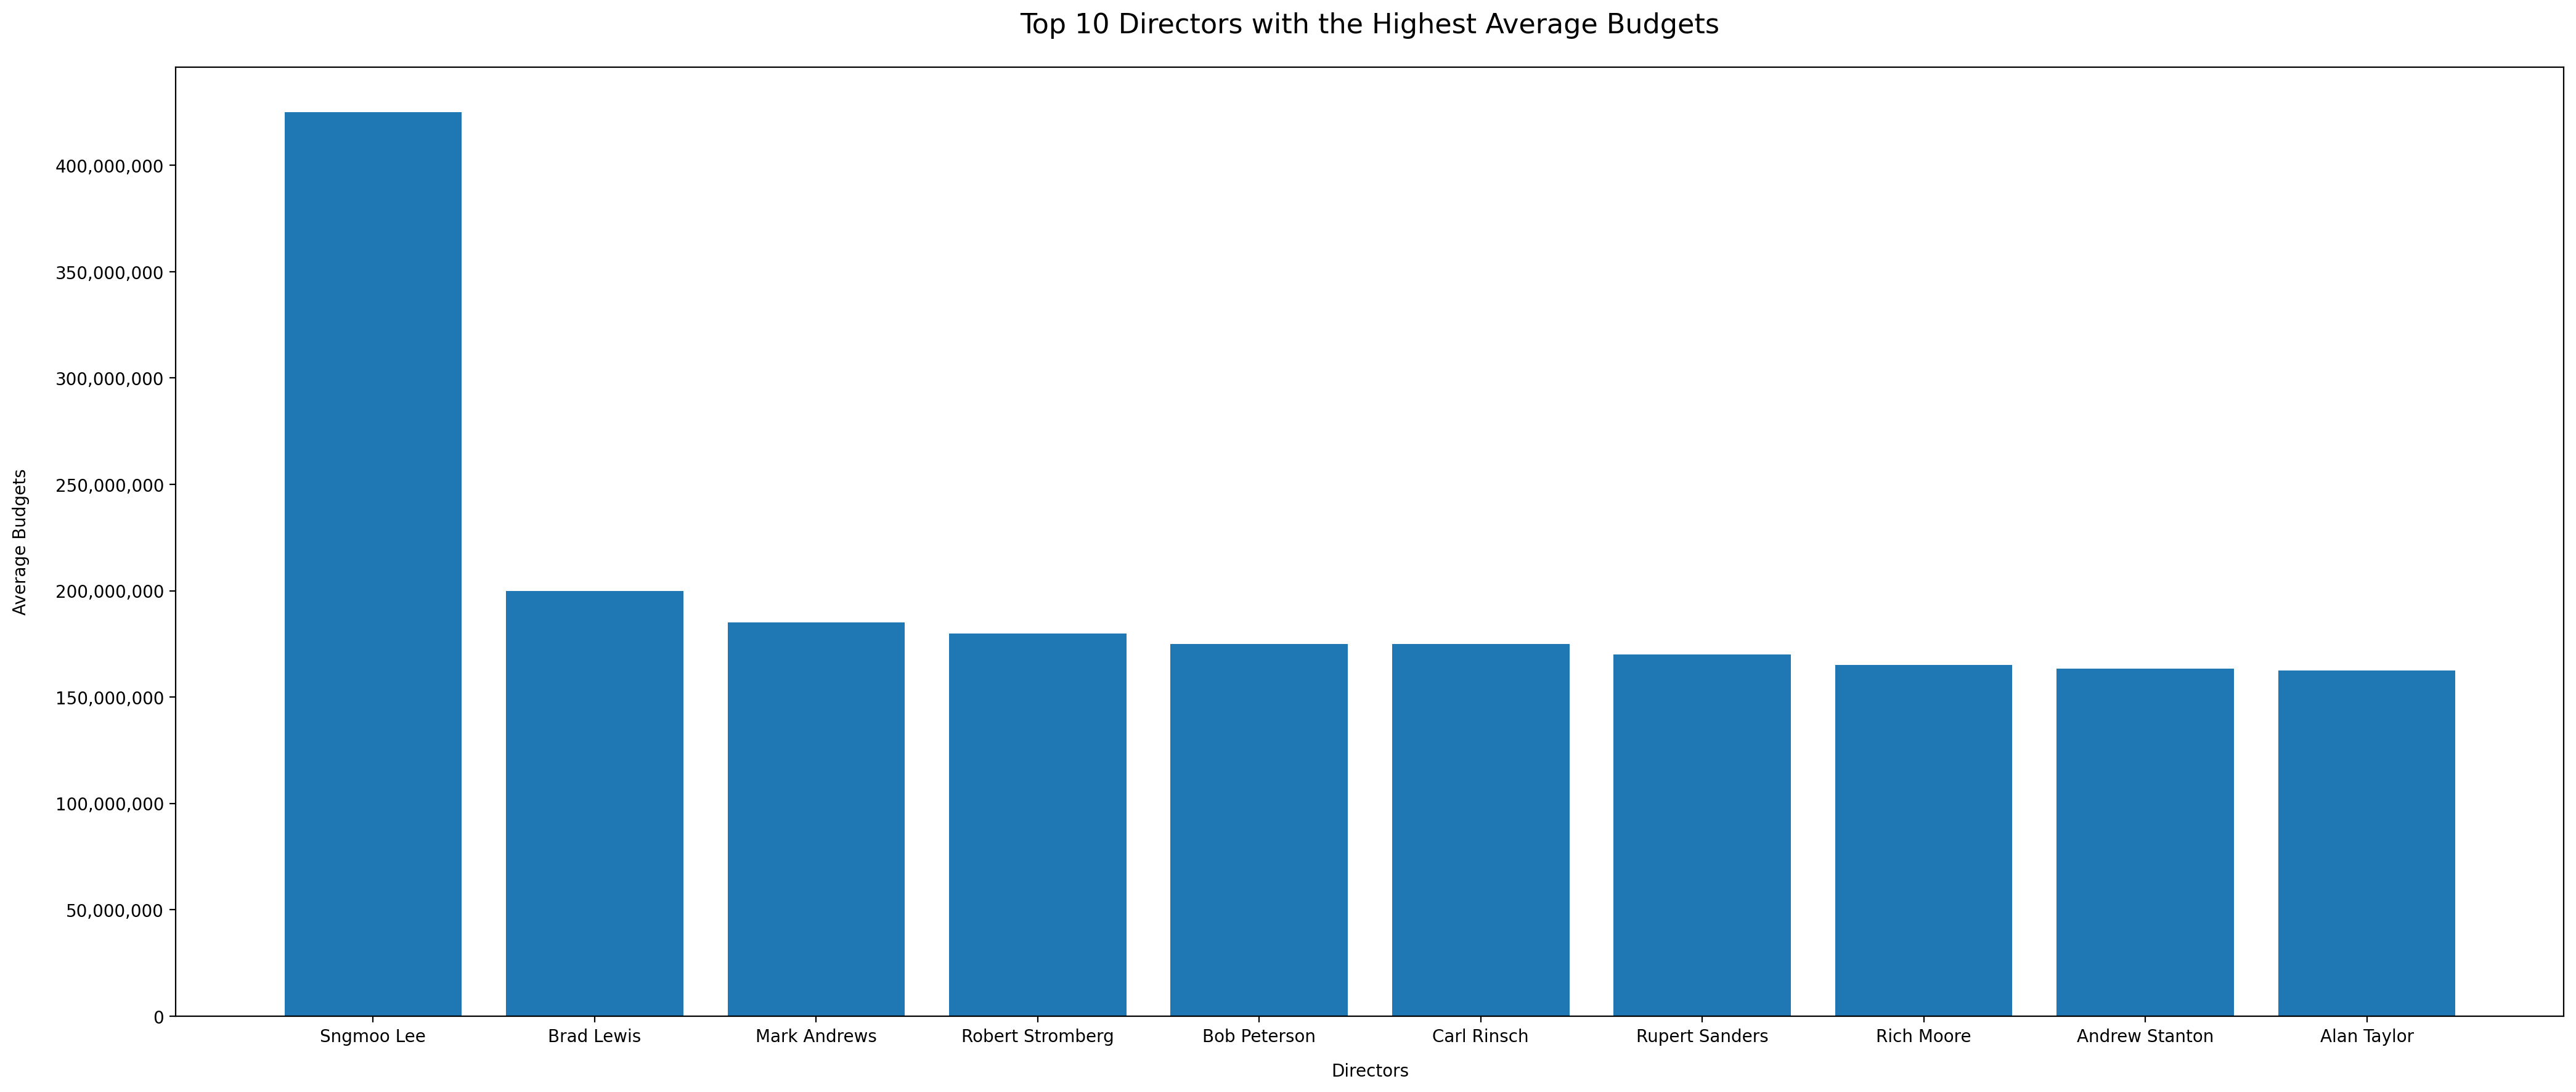

In [233]:
plt.figure(figsize=(25,10))
plt.bar(df_directorBudgets[:10].index, df_directorBudgets[:10])

plt.xlabel("Directors",labelpad=10)
plt.ylabel("Average Budgets",labelpad=15)
plt.title("Top 10 Directors with the Highest Average Budgets",pad=20,fontsize = 16)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

##### Directors who have worked with the lowest budgets

Since over 2000 directors have worked with a budget of zero, the plot will show the directors who have the most exprience with a budget of zero.

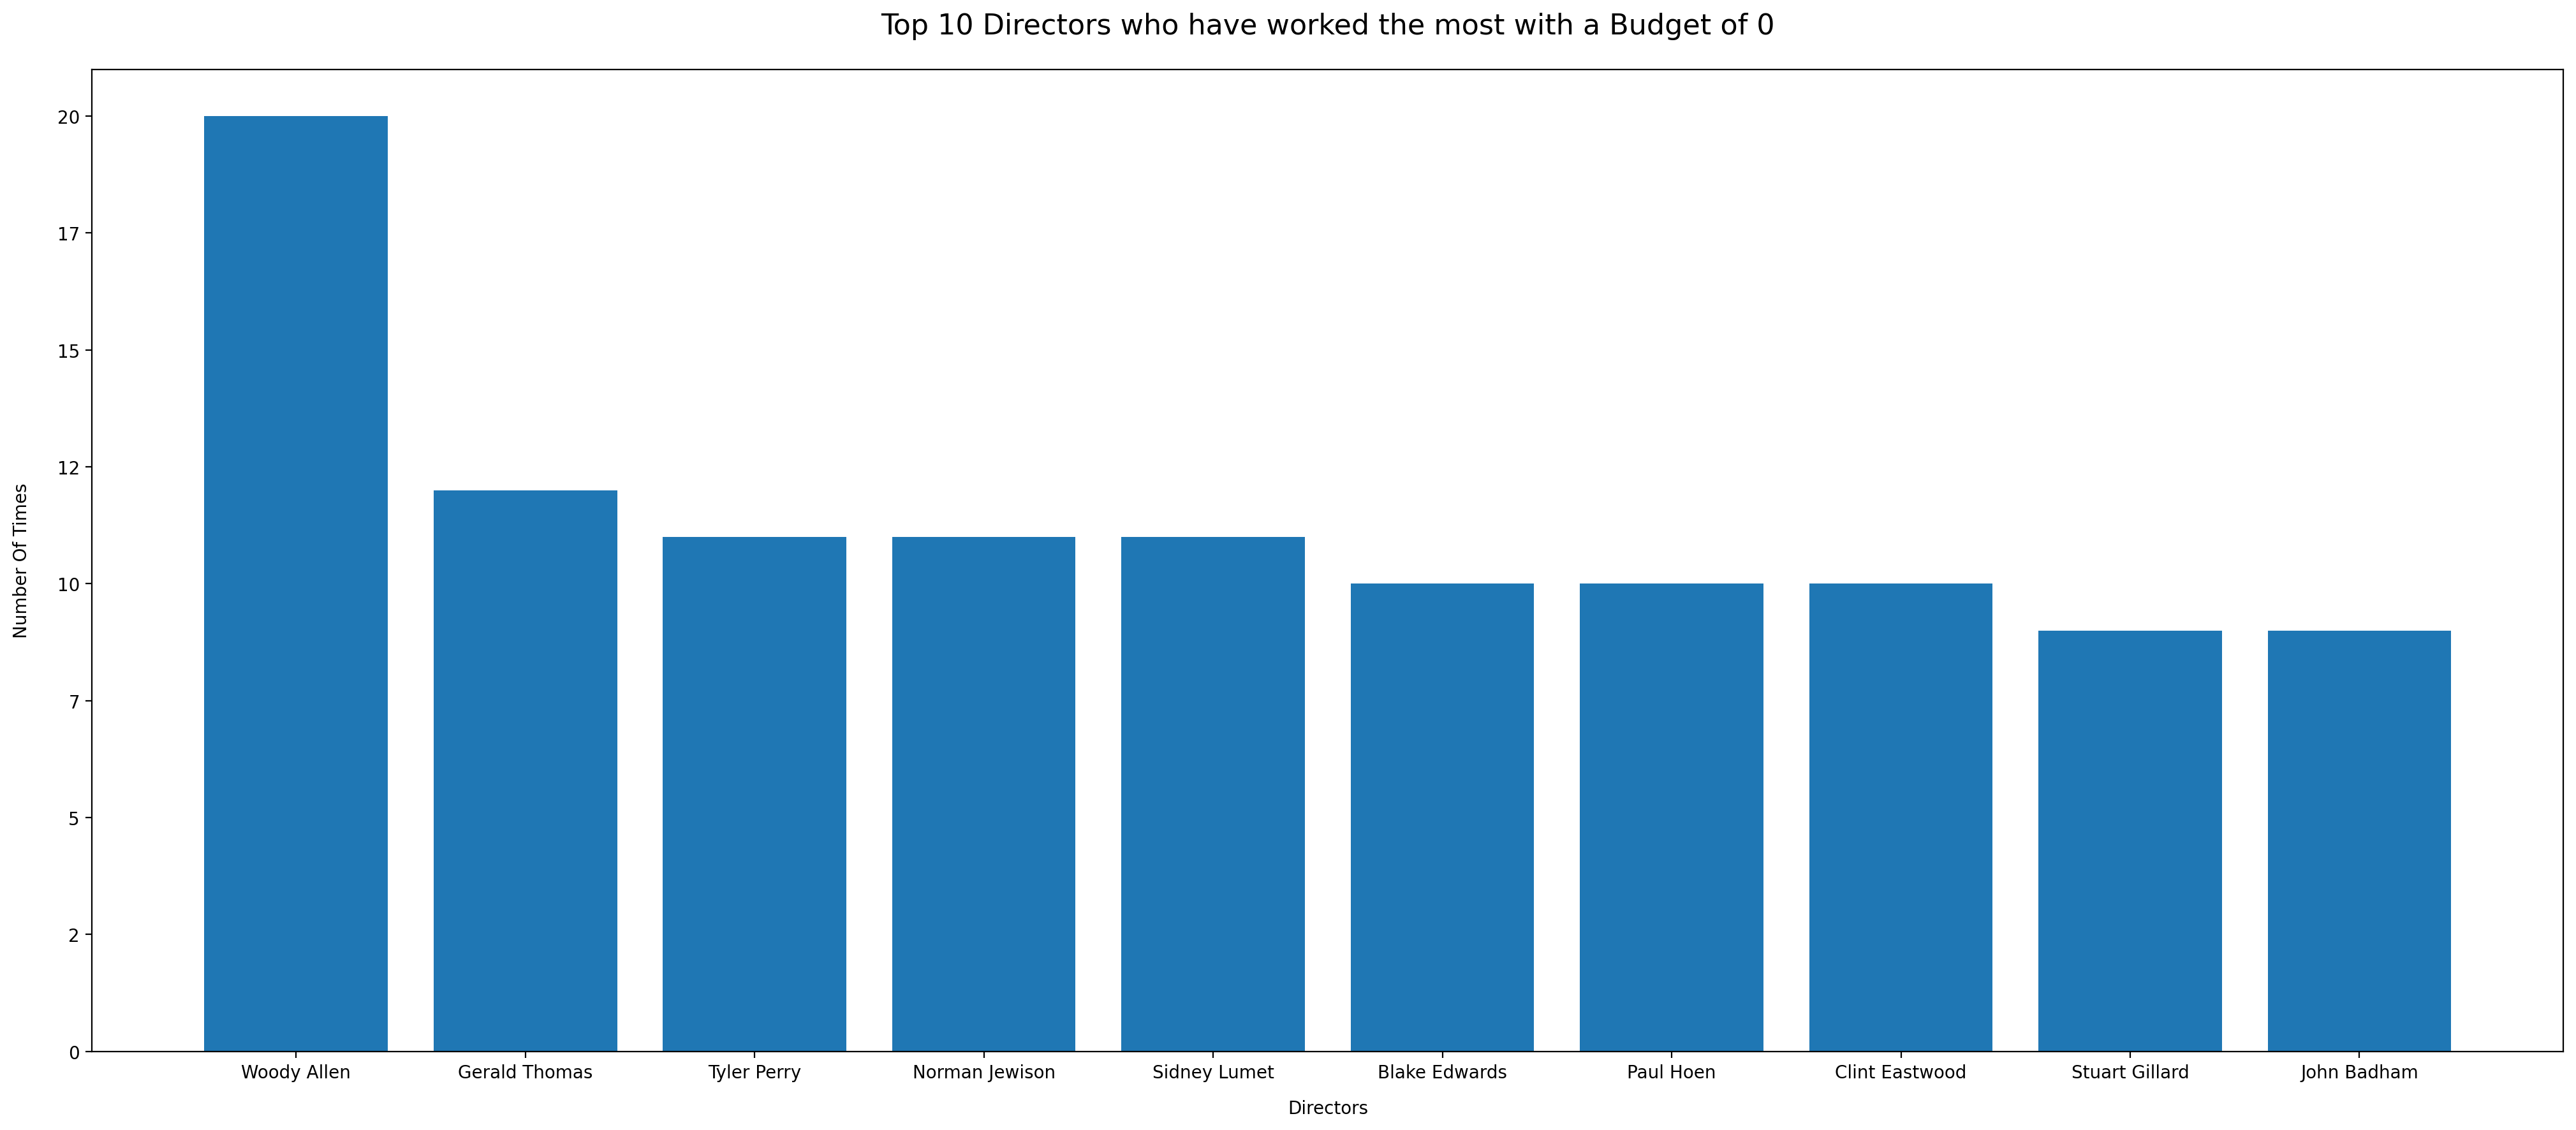

In [234]:
plt.figure(figsize=(25,10))
plt.bar(df_director_budget_zero[:10].index, df_director_budget_zero[:10])

plt.xlabel("Directors",labelpad=10)
plt.ylabel("Number Of Times",labelpad=15)
plt.title("Top 10 Directors who have worked the most with a Budget of 0",pad=20,fontsize = 16)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

#### Who are the directors that make the most popular short movies?

Getting the movies that are 15 minutes or less.

In [235]:
df_shortmovies = df_director.query("runtime<=15")
len(df_shortmovies),df_shortmovies

(161,
            id    imdb_id  popularity  budget  revenue  \
 88     370687  tt3608646    1.876037       0        0   
 206    286192  tt3824386    0.640151       0        0   
 261    355338  tt4941804    0.442835       0        0   
 309    361931  tt5065822    0.357654       0        0   
 409    353345  tt3800796    0.218528       0        0   
 ...       ...        ...         ...     ...      ...   
 11236   13934  tt0901686    0.523073       0        0   
 11237   46247  tt0902999    0.430182       0        0   
 11238   46247  tt0902999    0.430182       0        0   
 11438  105325  tt1114718    0.080811       0        0   
 11439  105325  tt1114718    0.080811       0        0   
 
                          original_title  \
 88             Mythica: The Necromancer   
 206                                Lava   
 261                 Riley's First Date?   
 309                             Ronaldo   
 409       The Exorcism of Molly Hartley   
 ...                            

##### Grouping by directors, finding the mean of populariting then sorting

In [236]:
df_shortmovies_mostpopular = df_shortmovies.groupby("director")["popularity"].mean().sort_values(ascending=False)
df_shortmovies_mostpopular

director
A. Todd Smith        1.876037
Jennifer Lee         1.724712
Chris Buck           1.724712
Drew Pearce          1.375493
John Kahrs           1.182679
                       ...   
Rob McLellan         0.017565
Tomek Baginski       0.017400
Joe Marino           0.011798
Christian Vincent    0.006440
David Lynch          0.005265
Name: popularity, Length: 134, dtype: float64

##### Basic statistical information about short movies popularity

In [237]:
df_shortmovies_mostpopular.describe()

count    134.000000
mean       0.331126
std        0.342901
min        0.005265
25%        0.118629
50%        0.218159
75%        0.417564
max        1.876037
Name: popularity, dtype: float64

##### Distribution of popularity of short movies per director

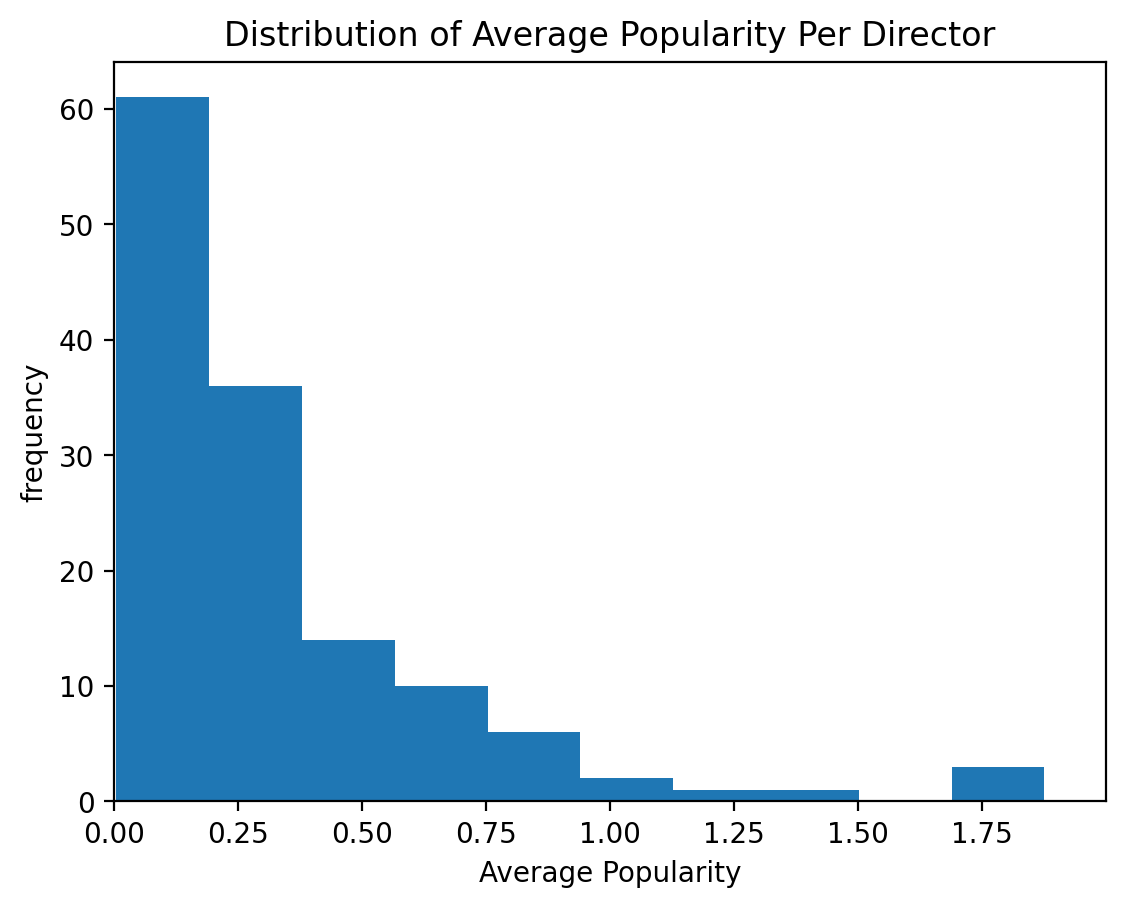

In [238]:
plt.hist(df_shortmovies_mostpopular)
plt.ylabel("frequency")
plt.xlabel("Average Popularity")
plt.title("Distribution of Average Popularity Per Director")
plt.xticks([x / 100.0 for x in range(0, 200, 25)])
plt.xlim(0,2)
plt.show()

##### Top 10 directors with the most popular short movies

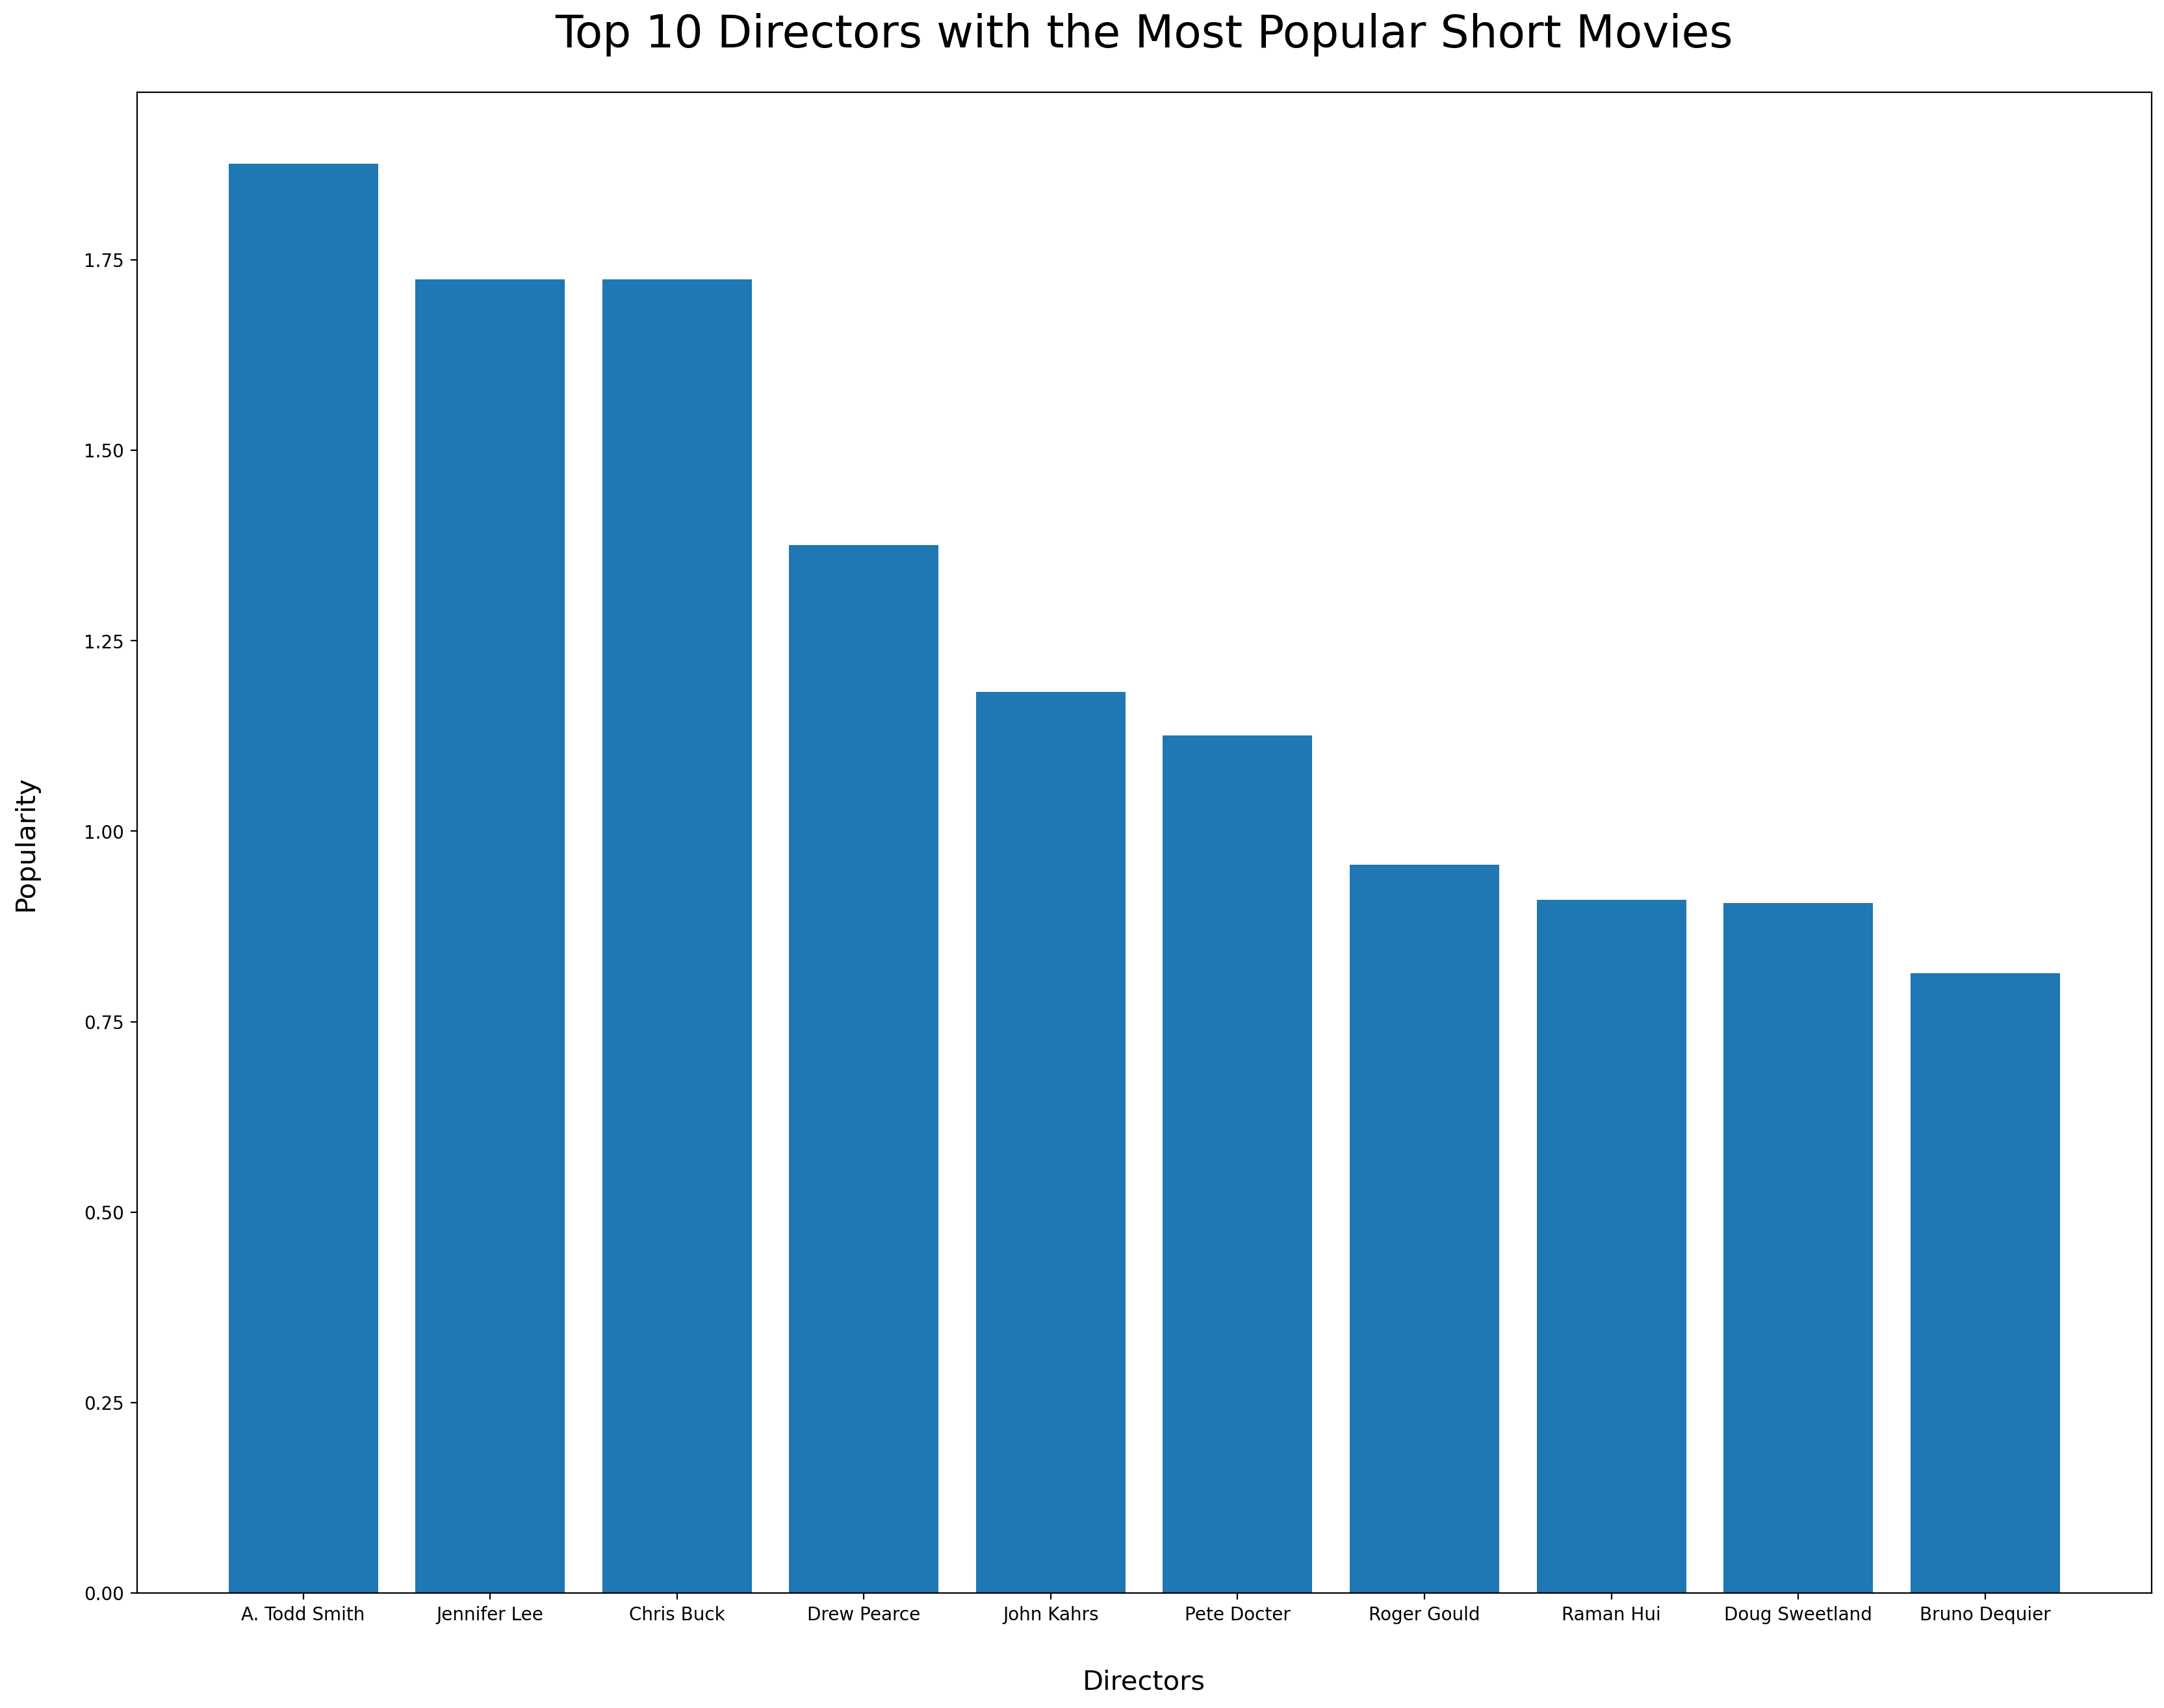

In [239]:
plt.figure(figsize=(20,15))
plt.title("Top 10 Directors with the Most Popular Short Movies",fontsize=25,pad=25)
plt.ylabel("Popularity",fontsize=15,labelpad=25)
plt.xlabel("Directors",fontsize=15,labelpad=25)
plt.bar(df_shortmovies_mostpopular[:10].index,df_shortmovies_mostpopular[:10])
plt.show()

## What movie genres were most profitable in the years 2005-2010?

First, the movies from the years 2005-2010 should be placed in a new dataframe.

### Finding the movies that came out 2005-2010

In [240]:
df_years = df_genre.query('(release_year-2000>=5) and (release_year-2000<=10)',engine="python")
df_years['release_year'].value_counts().sort_index(ascending=False)

release_year
2010    1189
2009    1339
2008    1223
2007    1101
2006    1035
2005     931
Name: count, dtype: int64

In [241]:
len(df_years['id'].unique())

2679

Over 2500 movies came out between 2005-2010

### Finding the movie genres with the most profits every year

In [242]:
df_years_mostprofits = df_years.groupby(['release_year','genres'])['profits'].sum()
df_years_mostprofits

release_year  genres         
2005          Action             2266540793
              Adventure          3750107979
              Animation          1047990116
              Comedy             3167109294
              Crime               705635716
                                    ...    
2010          Science Fiction    1924385753
              TV Movie             -2500000
              Thriller           1973299150
              War                 -59124111
              Western            -235220202
Name: profits, Length: 119, dtype: int64

In [243]:
years = list(zip(*df_years_mostprofits.index))[0]

#Remove duplicates
years = list(dict.fromkeys(years))
years

[2005, 2006, 2007, 2008, 2009, 2010]

In [244]:
#Doing some operations to make it easier to plot

year_mostprofits = []
profits_mostprofits=[]

for year in years:
    df_years_mostprofits[year] = df_years_mostprofits[year].sort_values(ascending=False)
    year_mostprofits.append(str(year)+': '+df_years_mostprofits[year].index[0])
    profits_mostprofits.append(df_years_mostprofits[year].iloc[0])


In [245]:
year_mostprofits

['2005: Action',
 '2006: Action',
 '2007: Action',
 '2008: Action',
 '2009: Action',
 '2010: Action']

In [246]:
profits_mostprofits

[3750107979, 3866367767, 5035003865, 4716633676, 8162274221, 5789413154]

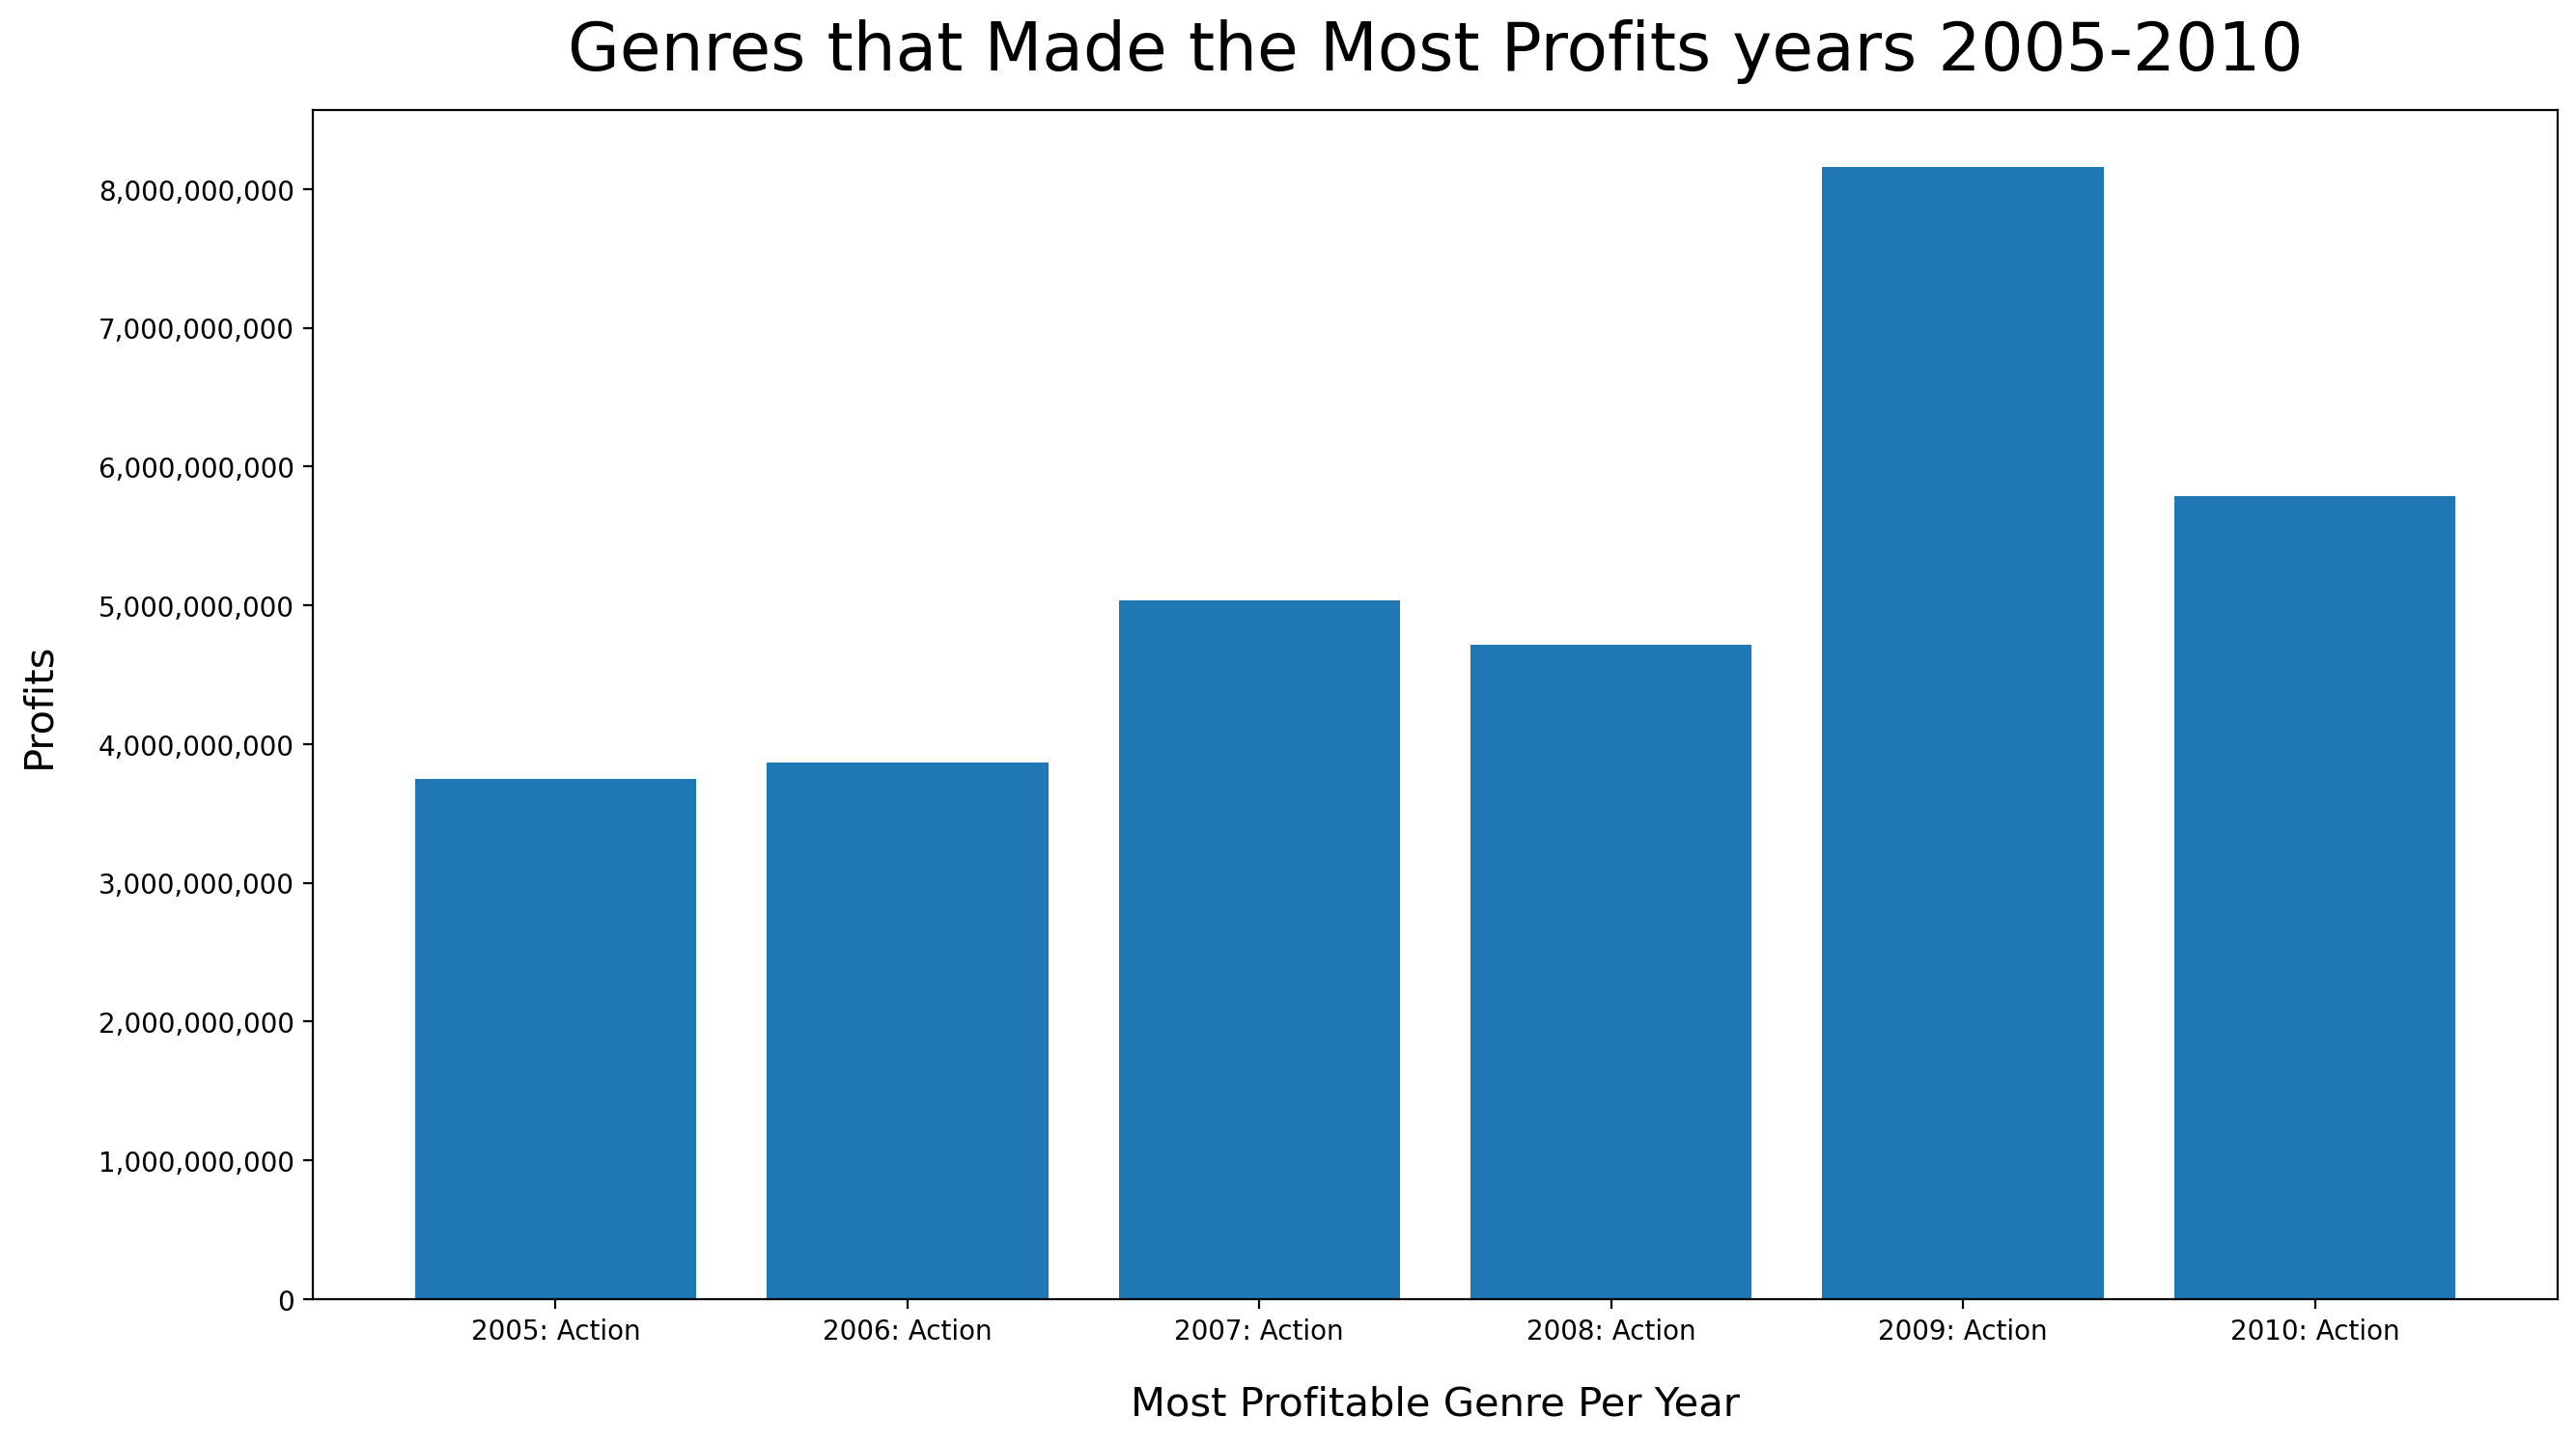

In [247]:
plt.figure(figsize=(15,8))
plt.bar( year_mostprofits, profits_mostprofits)
plt.title("Genres that Made the Most Profits years 2005-2010",fontsize=25,pad=15)
plt.xlabel("Most Profitable Genre Per Year",fontsize=15,labelpad=15)
plt.ylabel("Profits",fontsize=15,labelpad=15)


plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## What are the movies that have a profit of over 1,000,000,000 dollars with the least budgets?

### First, finding the movies with a profit of over 1 billion.

In [248]:
df_mostprofits = df[df['profits'] >= 1000000000]
len(df_mostprofits),df_mostprofits

(13,
           id    imdb_id  popularity     budget     revenue  \
 0     135397  tt0369610   32.985763  150000000  1513528810   
 3     140607  tt2488496   11.173104  200000000  2068178225   
 4     168259  tt2820852    9.335014  190000000  1506249360   
 8     211672  tt2293640    7.404165   74000000  1156730962   
 14     99861  tt2395427    5.944927  280000000  1405035767   
 1386   19995  tt0499549    9.432768  237000000  2781505847   
 3374   12445  tt1201607    5.711315  125000000  1327817822   
 4361   24428  tt0848228    7.637767  220000000  1519557910   
 4949     122  tt0167260    7.122455   94000000  1118888979   
 5231     597  tt0120338    4.355219  200000000  1845034188   
 5422  109445  tt2294629    6.112766  150000000  1274219009   
 5425   68721  tt1300854    4.946136  200000000  1215439994   
 8094    1642  tt0113957    1.136610   22000000  1106279658   
 
                                      original_title  \
 0                                    Jurassic World   

### Basic Statistical information about movies with profits above 1 billion

In [249]:
df_mostprofits['profits'].describe()

count    1.300000e+01
mean     1.361267e+09
std      4.346963e+08
min      1.015440e+09
25%      1.084280e+09
50%      1.202818e+09
75%      1.363529e+09
max      2.544506e+09
Name: profits, dtype: float64

In [250]:
df_mostprofits['budget'].describe()

count    1.300000e+01
mean     1.647692e+08
std      7.162071e+07
min      2.200000e+07
25%      1.250000e+08
50%      1.900000e+08
75%      2.000000e+08
max      2.800000e+08
Name: budget, dtype: float64

### Checking out the distribtution of profits over 1 billion

In [251]:
df_mostprofits_sorted = df_mostprofits.sort_values(by='profits')

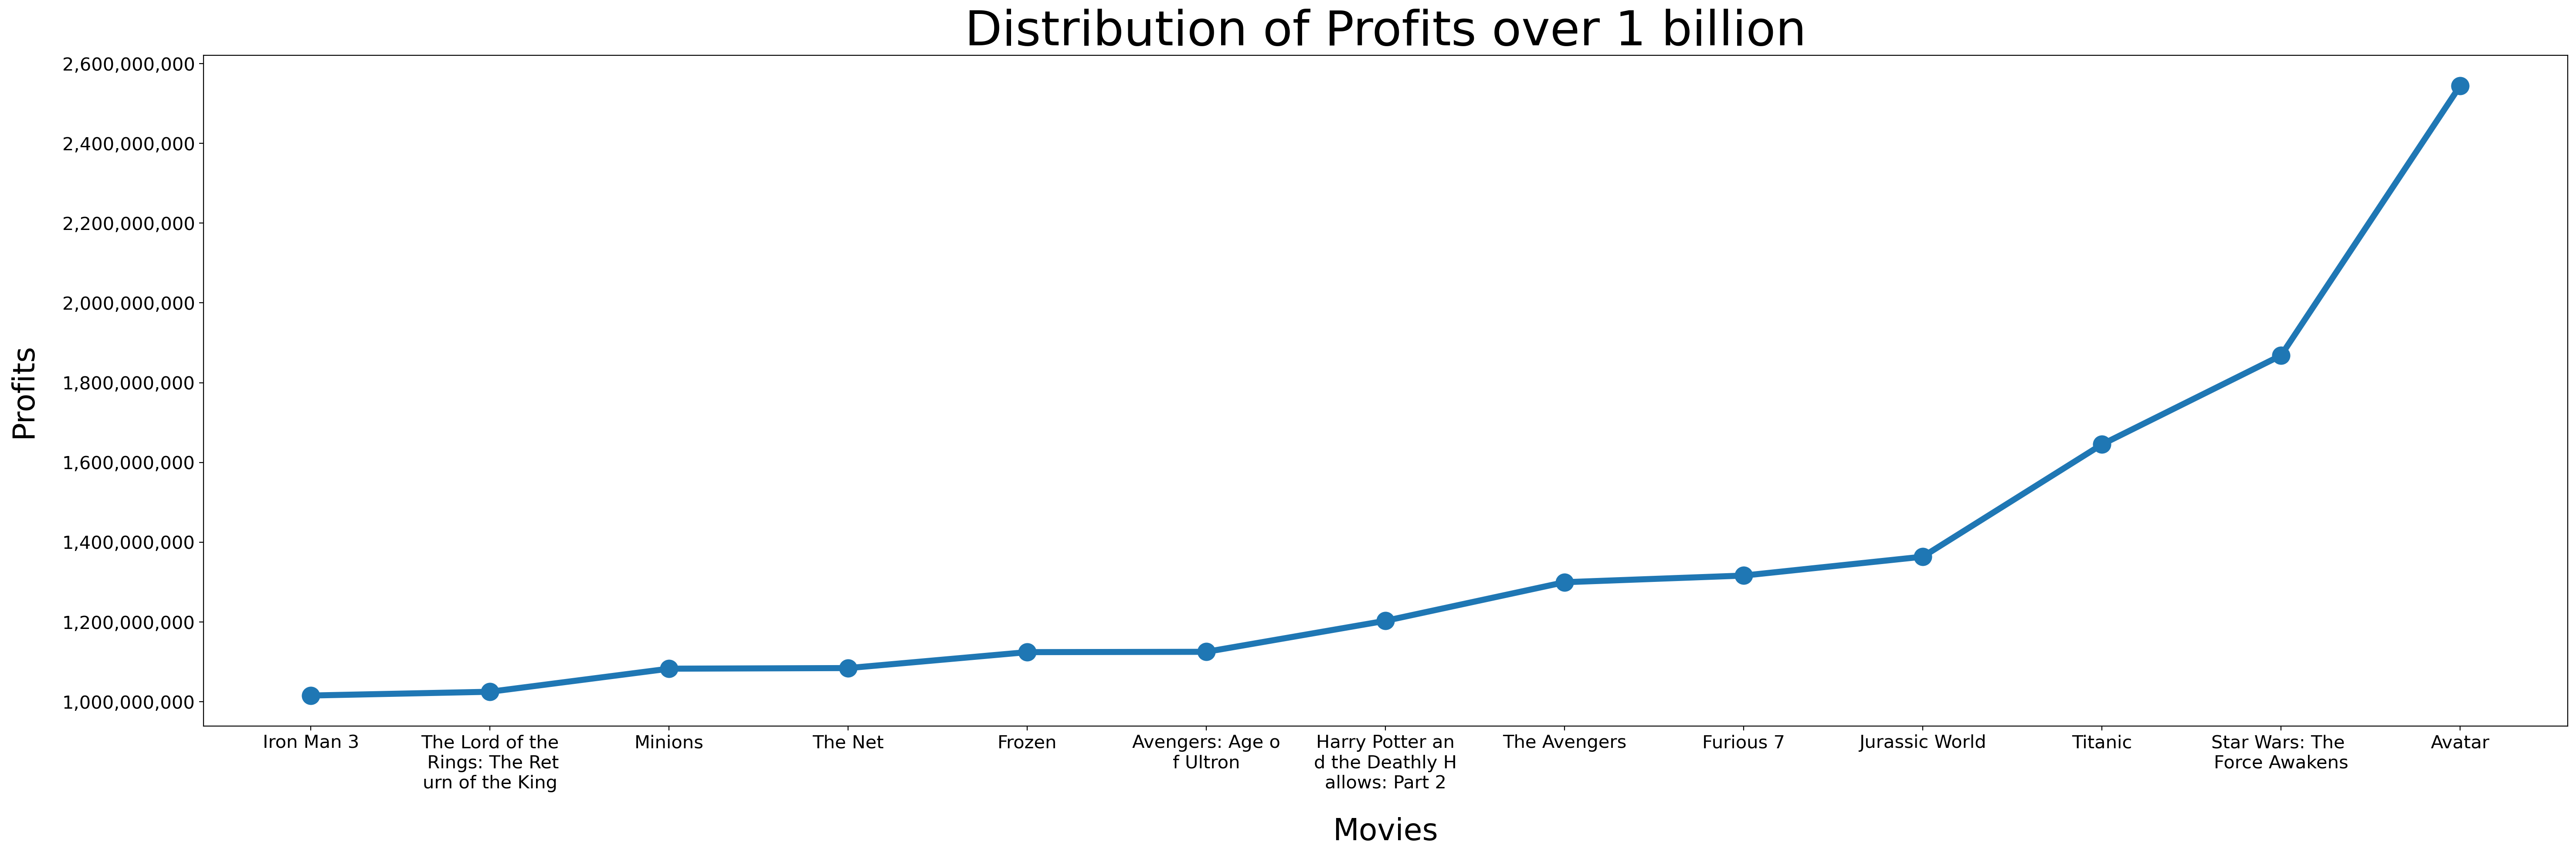

In [252]:
xlabels_new = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in df_mostprofits_sorted.original_title]

plt.figure(figsize=(35,10))
plt.scatter(xlabels_new,df_mostprofits_sorted.profits,s=200)
plt.plot(xlabels_new,df_mostprofits_sorted.profits,linewidth=5)
plt.title("Distribution of Profits over 1 billion", fontsize=40)
plt.xlabel("Movies",fontsize=25)
plt.ylabel("Profits",fontsize=25,labelpad=20)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)


plt.show()

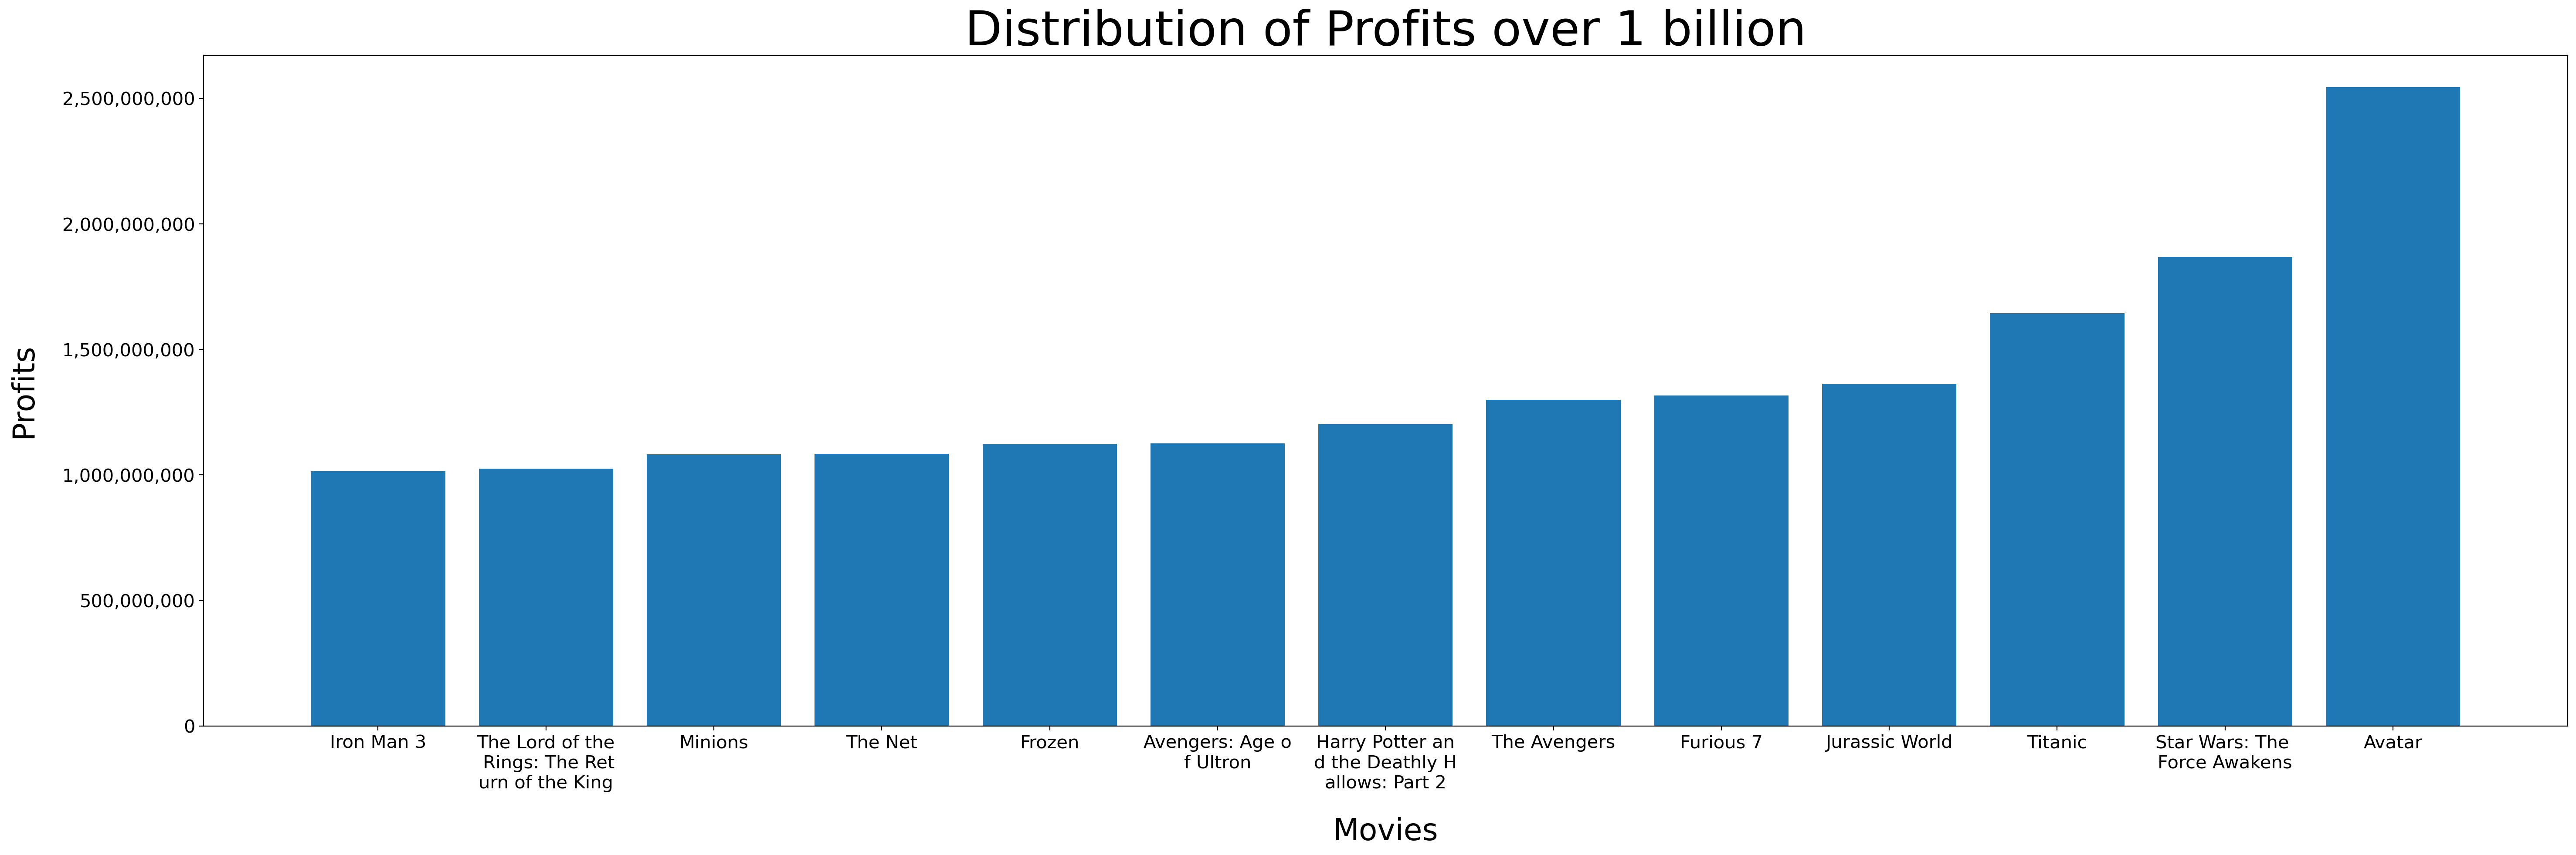

In [253]:
xlabels_new = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in df_mostprofits_sorted.original_title]


plt.figure(figsize=(35,10))
plt.bar(xlabels_new,df_mostprofits_sorted.profits)
plt.title("Distribution of Profits over 1 billion", fontsize=40)
plt.xlabel("Movies",fontsize=25)
plt.ylabel("Profits",fontsize=25,labelpad=20)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)



plt.show()

### Sorting the profits based on the budgets

In [254]:
df_mostprofits_budgets = df_mostprofits.sort_values(by='budget')

### Distribution of budgets

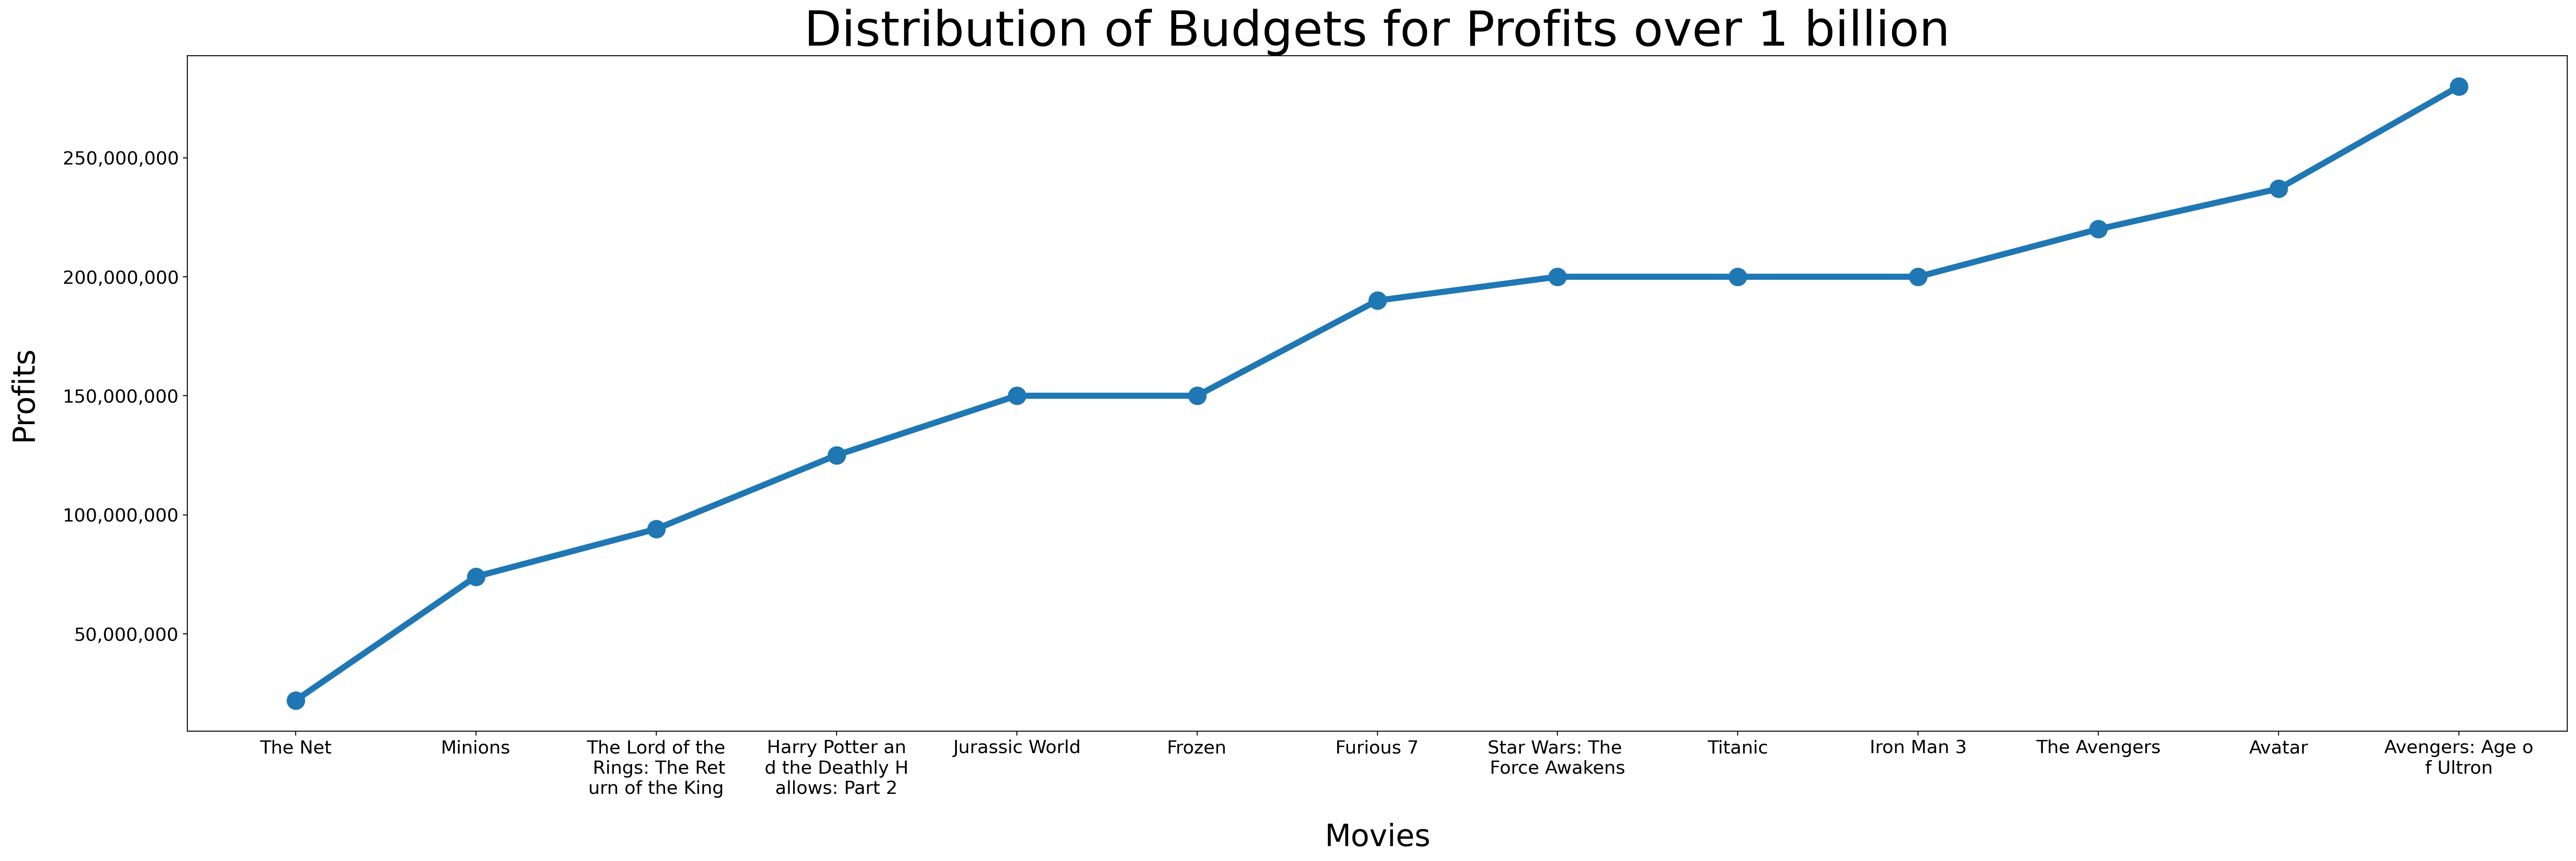

In [255]:
xlabels_new = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in df_mostprofits_budgets.original_title]

plt.figure(figsize=(35,10))
plt.scatter(xlabels_new,df_mostprofits_budgets.budget,s=200)
plt.plot(xlabels_new,df_mostprofits_budgets.budget,linewidth=5)
plt.title("Distribution of Budgets for Profits over 1 billion", fontsize=40)
plt.xlabel("Movies",fontsize=25)
plt.ylabel("Profits",fontsize=25,labelpad=20)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=30)

plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)


plt.show()

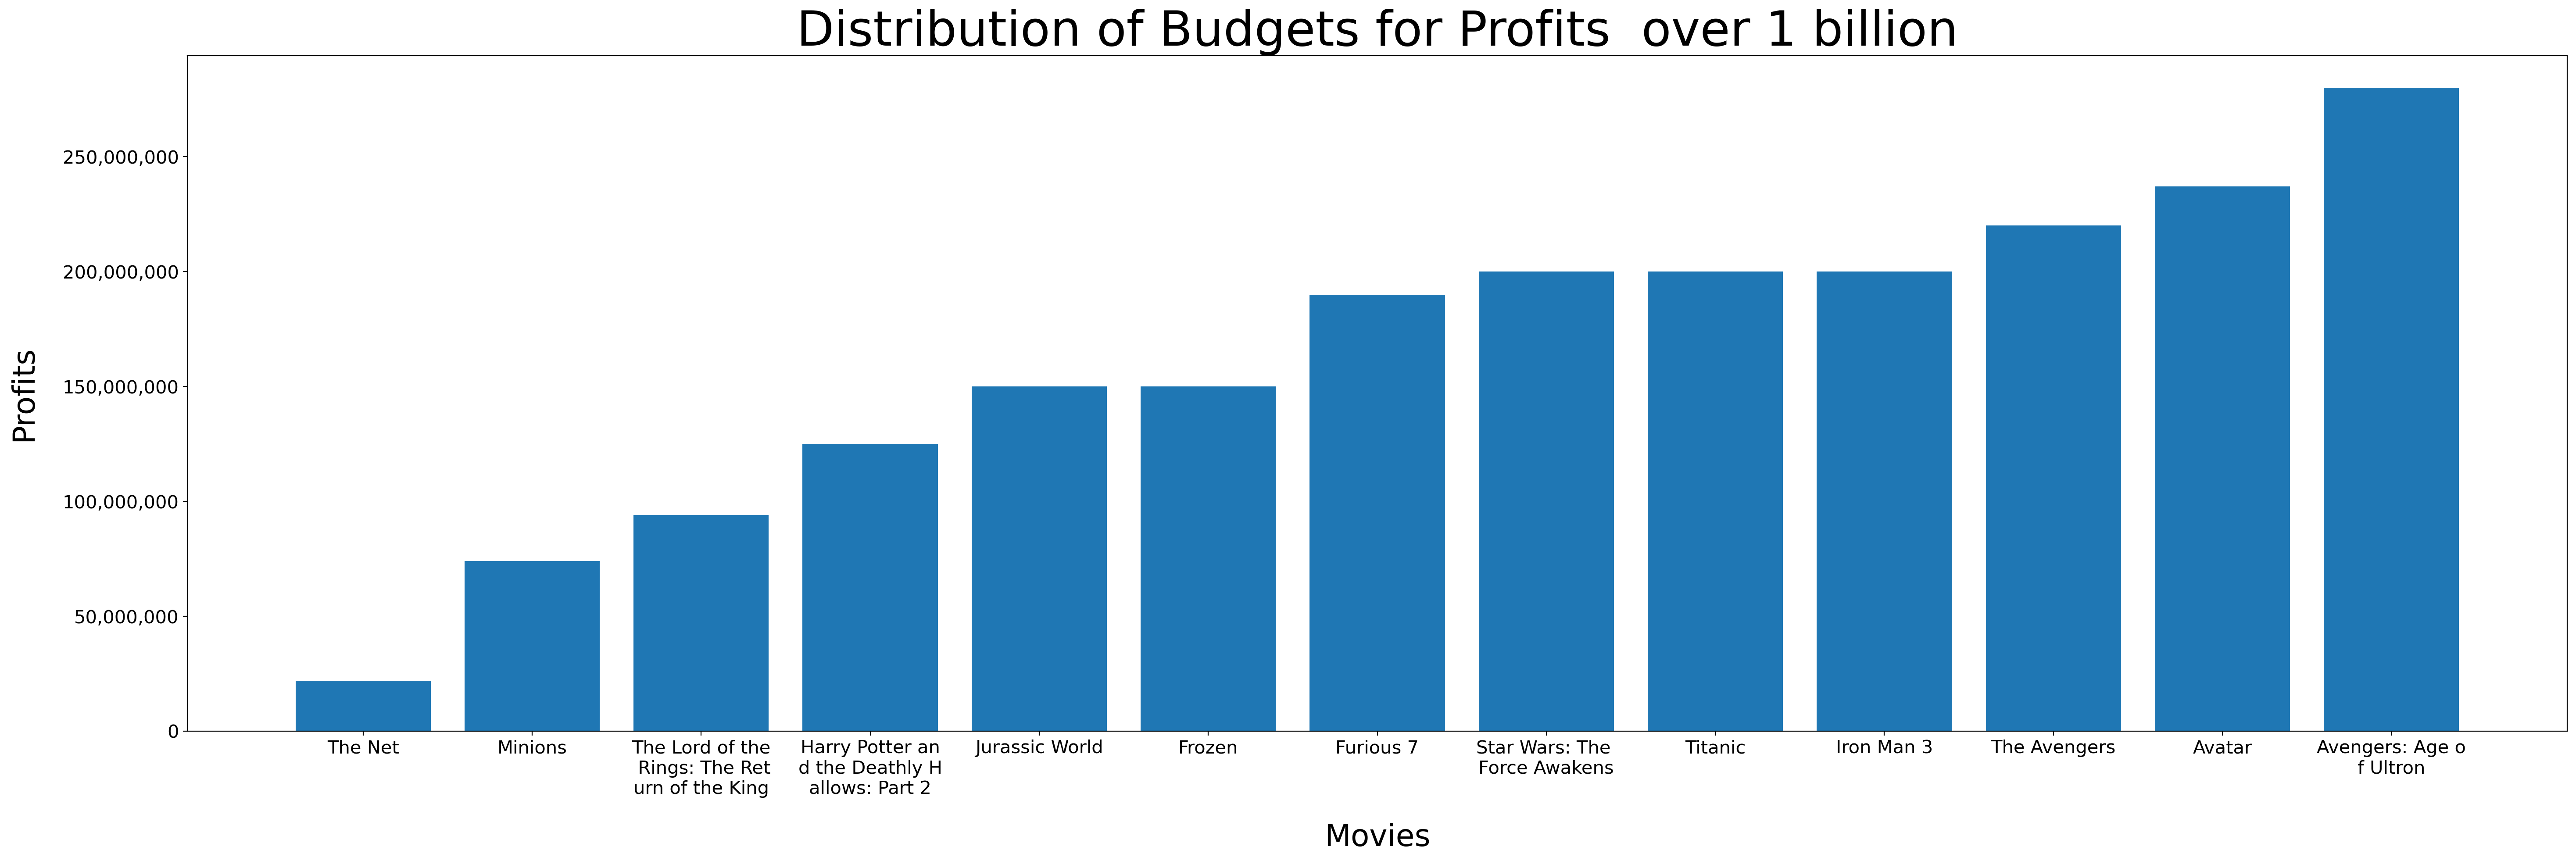

In [256]:
xlabels_new = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in df_mostprofits_budgets.original_title]

plt.figure(figsize=(35,10))
plt.bar(xlabels_new,df_mostprofits_budgets.budget)
plt.title("Distribution of Budgets for Profits  over 1 billion", fontsize=40)
plt.xlabel("Movies",fontsize=25)
plt.ylabel("Profits",fontsize=25,labelpad=20)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)


plt.show()

### Calculating Budget to profit Ratio

In [257]:
ratios = df_mostprofits['profits']/df_mostprofits['budget']
df_sorted_ratios = df_mostprofits.loc[ratios.sort_values(ascending=False).index]
len(ratios),df_sorted_ratios

(13,
           id    imdb_id  popularity     budget     revenue  \
 8094    1642  tt0113957    1.136610   22000000  1106279658   
 8     211672  tt2293640    7.404165   74000000  1156730962   
 4949     122  tt0167260    7.122455   94000000  1118888979   
 1386   19995  tt0499549    9.432768  237000000  2781505847   
 3374   12445  tt1201607    5.711315  125000000  1327817822   
 3     140607  tt2488496   11.173104  200000000  2068178225   
 0     135397  tt0369610   32.985763  150000000  1513528810   
 5231     597  tt0120338    4.355219  200000000  1845034188   
 5422  109445  tt2294629    6.112766  150000000  1274219009   
 4     168259  tt2820852    9.335014  190000000  1506249360   
 4361   24428  tt0848228    7.637767  220000000  1519557910   
 5425   68721  tt1300854    4.946136  200000000  1215439994   
 14     99861  tt2395427    5.944927  280000000  1405035767   
 
                                      original_title  \
 8094                                        The Net   

In [258]:
ratios.sort_values(ascending=False)

8094    49.285439
8       14.631499
4949    10.903074
1386    10.736312
3374     9.622543
3        9.340891
0        9.090192
5231     8.225171
5422     7.494793
4        6.927628
4361     5.907081
5425     5.077200
14       4.017985
dtype: float64

In [259]:
ratios.describe()

count    13.000000
mean     11.635370
std      11.649132
min       4.017985
25%       6.927628
50%       9.090192
75%      10.736312
max      49.285439
dtype: float64

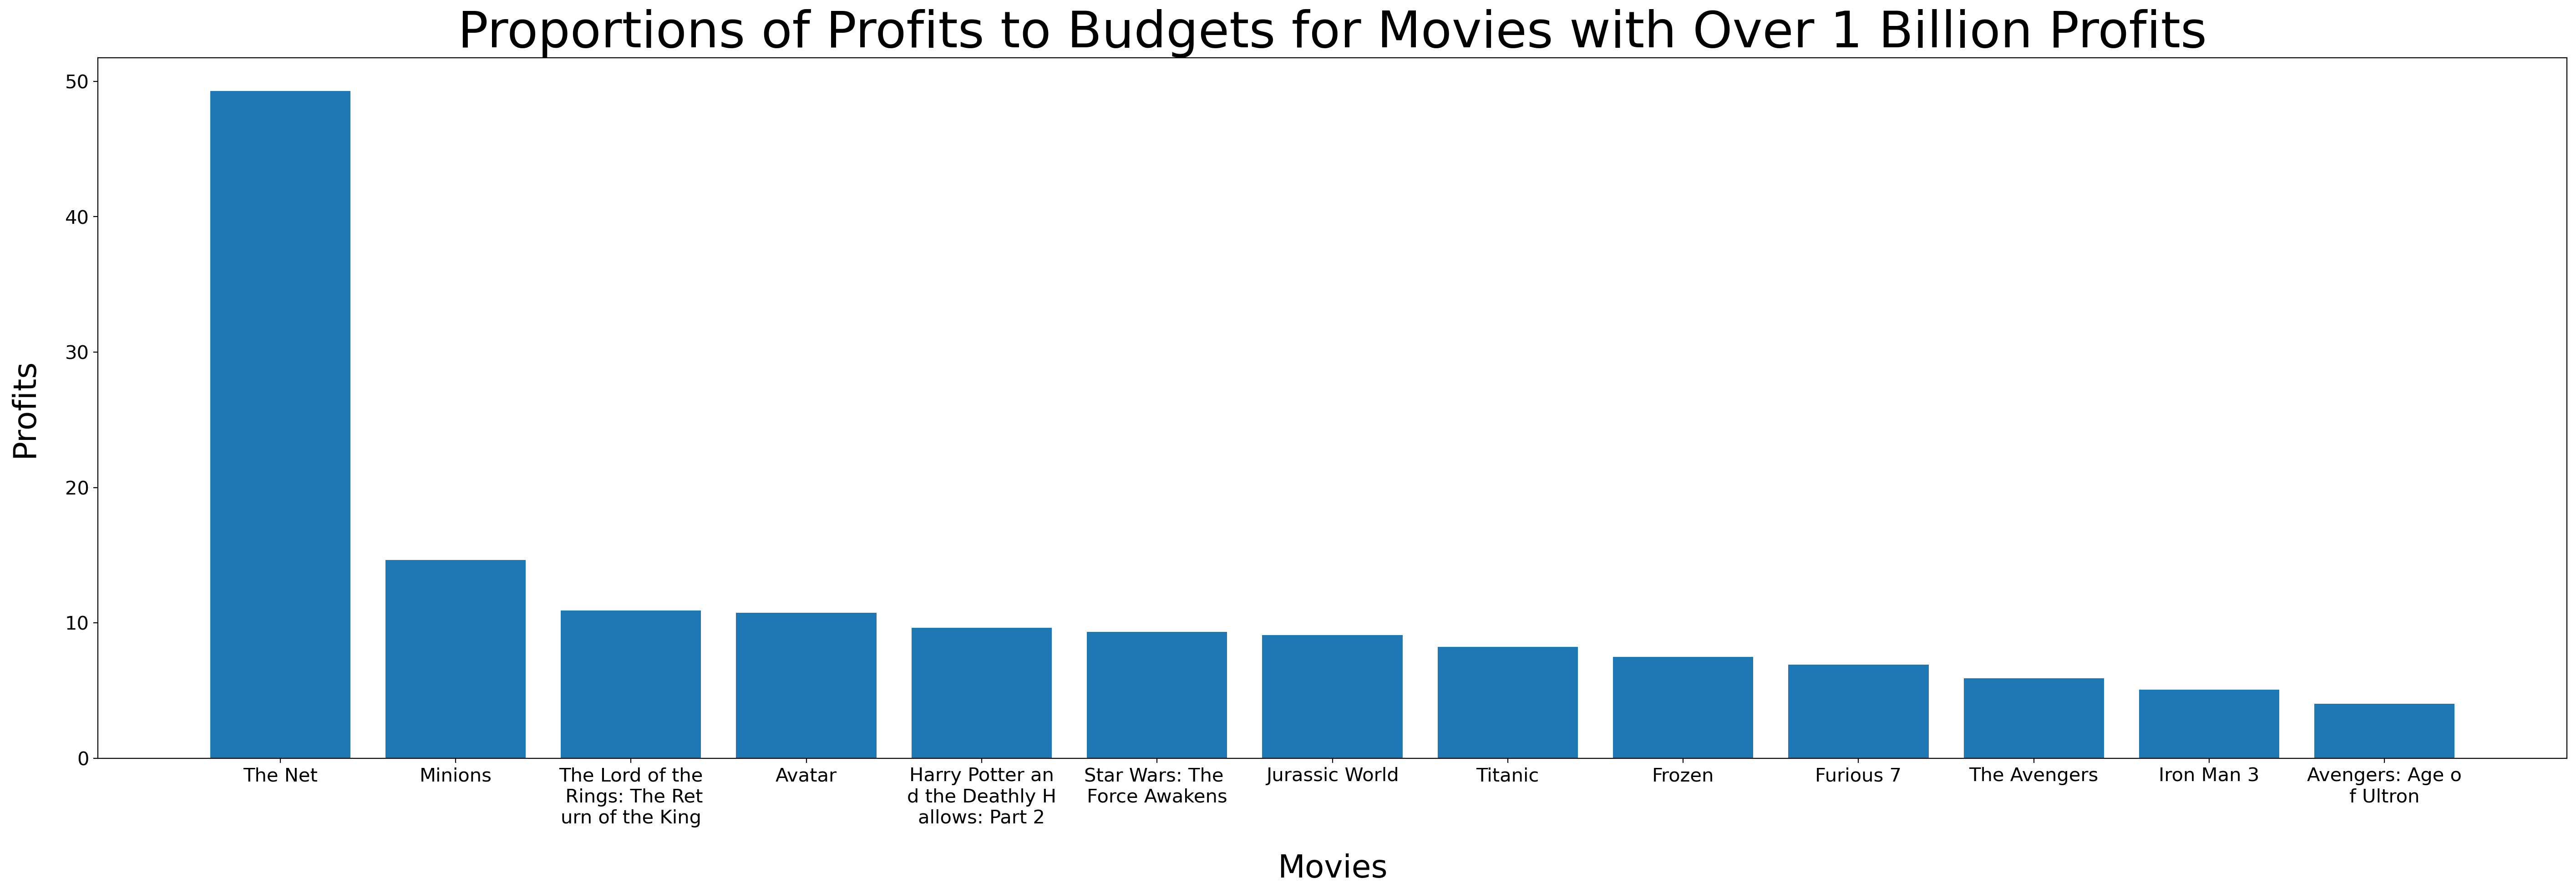

In [260]:
xlabels_new = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in df_sorted_ratios.original_title]


plt.figure(figsize=(35,10))
plt.bar(xlabels_new,ratios.sort_values(ascending=False))
plt.title("Proportions of Profits to Budgets for Movies with Over 1 Billion Profits", fontsize=40)
plt.xlabel("Movies",fontsize=25,multialignment='center')
plt.ylabel("Profits",fontsize=25,labelpad=20)
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().tick_params(axis='y', labelsize=15)
plt.gca().tick_params(axis='x', labelsize=15)

#plt.xticks(df_sorted_ratios.original_title, df_sorted_ratios.original_title)


plt.show()

<a id='conclusions'></a>
# Conclusions




Reminder of what the question for analysis are:

* What are the properties of movies that yield the highest revenue vs movies that have the least revenue?
* Which directors should be hired?
* What movie genres were most profitable in the years 2005-2010?
* What are the movies that have a profit of over 1,000,000,000 dollars with the least budget to profit ratio?

## What are the properties of movies that yield the highest revenue vs movies that have the least revenue??

According to initial viewing of the data, it was foudn that around 54% of movies had a revenue of 0, while he top 10% of highest revenue movies had revenues exceeding 1 billion. Based on this information, the top 10% were taken for the movies with the highest revenue while the bottom 65% were taken for the movies with the least revenue, to include with 0 and non-zero revenue movies.

Some basic statistical information about the highest revenue movies are:

* Has an average of 3 billion dollars
* Has a standard devaion of 2.4 billion dollars
* Minimum of 1.1 billion dollars
* 25% of these movies have a revenue of 1.5 billion dollars or less
* 50% of these movies have a revenue of 2.1 billion dollars or less
* 75% of these movies have a revenue of 3.5 billion dollars or less
* Maximum of 27 billion dollars
  
Some basic statistical information about the highest revenue movies are:

* Has an average of 280,000 dollars
* Has a standard devaion of 984,000 dollars
* Minimum of 0 dollars
* 25% of these movies have a revenue of 0 dollars
* 50% of these movies have a revenue of 0 dollars
* 75% of these movies have a revenue of 0 dollars
* Maximum of 6  million dollars

Some interesting properties to look at in regards to highest and lowest revenue movies were: `budget`, `runtime`, `popularity`. Which is basically like asking the sub questions:

* Can higher budgets increase a movie's revenue?
* What is the average runtime of highest and lowest revenue movies?
* Do movies that are more popular have more or less revenue?

### Can higher budgets increase a movie's revenue?

First, the average budgets needed to be calculated for both types of movies, where it was found that the movies with the least revenue had an average budget of **2,991,935 dollars**, while movies with the most revenue had an average budget of **74,465,160 dollars**. Meaning, movies with the most revenue tend to have a budget that is 25 times larger than movies with low revenue.


![](plots/revenue_plot_1.png)


### What is the average runtime of highest and lowest revenue movies?

The average runtime of movies with low revenues are around **98 minutes** while movies with more revenue tend to have a runtime of around **116 minutes**. Which means movies with lower revenue tend to have a runtime closer to the hour and half mark while movies with a larger revenue tend to have a runtime closer to 2 hours.

![](plots/revenue_plot_2.png)

### Do movies that are more popular have more or less revenue?

Movies with less revenue tend to have an average popularity of around **0.35** while moves with more revenue tend to have an average popularity of around **2.2**. Which means movies with more revenue tend to be 6 times more popular.

![](plots/revenue_plot_3.png)


It can be concluded that:

> Movies with more revenue tend to have a **higher budget**, being in the 8 figures while movies with low revenue have a **lower budget** being in the 7 figures.
> Movies with more revenue tend to have a **runtime of around 2 hours** while movies with lower revenue tend to have a **runtime of around 1 and half hours**.
> Movies that more runtime tend to be **more popular** than movies with less revenue.


## Which directors should be hired?

Hiring a director relies on different circumstances depending on the movie, some initial criteria to decide would be:

* Which directors create movies with the most profits?
* If the goal is to create a movie that gets the highest votes, which director should be chosen?
* Which directors have the most experience working with high budgets and which with low budgets?
* Who are the directors that make the most popular short movies?

## Which directors create movies with the most profits?

The profits of the directors was found by summing all of the profits of each of the directors movies. It was found that around 22% of directors tend to lose money on their movies, 45% do not make any profits at all and only 33% of directors actually make a profit.

Some statistical information about profits of directors:

* The average profits is around 57 million dollars
* The standard deviation is around 27 million dollars
* The minimum profits is around -41 million dollars (which means there is a director whose movies lose a lot of money)
* 50% of these movies have a profit of 0 dollars
* 75% of these movies have a profit of 4.5 million dollars or less
* The maximum profits is 7.4 billion dollars

The distribution of director profits can be seen in the following histogram:

![](plots/director_plot_1.png)

The 10 directors who have made the most profits are:

![](plots/director_plot_2.png)

The 10 directors who have made the least profits are:

![](plots/director_plot_3.png)


### If the goal is to create a movie that gets the highest votes, which director should be chosen?

The votes are out of 10. For each directory, the average `vote_average` was calculated. Some statistical information about the average `vote_average` directors have are:

* The average vote is around 5.8
* The standard deviation is around 0.9
* The minimum vote average is 1.5
* 25% of directors have a vote average of 5.35 or less
* 50% of directors have a vote average of 5.95 or less
* 75% of directors have a vote average of 6.5 or less
* The maximum vote average is 9.4

Most directors tend to have a vote average of less than 6.

The distribution of the average `vote_averages` per director can be seen in the following histogram:

![](plots/director_plot_4.png)

The 10 directors with the best vote average:

![](plots/director_plot_5.png)

The 10 directors with the worst vote average:

![](plots/director_plot_6.png)


### Which directors have the most experience working with high budgets and which with low budgets?

The basic statistical information about directors and their budgets are:

* The average budget per director 8.6 million dollars
* The standard deviation is around 20 million dollars
* The minimum average budget per director is 0
* 50% of directors have an average budget of 0
* 75% of directors have an average budget of 7.6 million dollars or less
* The maximum average budget is 424 million dollars

Most directors tend to make movies with a budget of 0 dollars. Average director budgets are rarely in the 8 figure range. Out of 5294 directors, 2797 directors had an average budget of 0. 1891 directors have worked on multiple movies with a budget of 0. Instead of taking all directors who have worked with a budget of zero, it's best to take the the directors who have worked with the most movies with a budget of zero.

The distribution of the average budgets per director can be seen in the following histogram:

![](plots/director_plot_7.png)

The 10 directors with the highest average budgets are:

![](plots/director_plot_8.png)

The 10 directors who have worked the most with movies with a budget of 0:

![](plots/director_plot_9.png)

### Who are the directors that make the most popular short movies?

There are many short movies out there. But a director may not be the best in one of the previous criteria due to being overshadowed by a director who worked on a bigger movie. Taking short movies as their own category may help certain people looking to create a shortmovie.

In the TMDb dataset, there are 161 short movies. Some basic statistical information about short movies popularity are as follows:

* The average popularity is 0.38
* The standard deviation is 0.34
* The minimum popularity 0.005
* 25% of short movies have a popularity of 0.11 or less
* 50% of short movies have a popularity of 0.218 or less
* 75% of short movies have a popularity of 0.417 or less
* The maximum popularity of a short movie is 1.8

The distribution of popularity of short movies can be seen in the following histogram:

![](plots/director_plot_10.png)

The 10 directors with the most popular short movies are:

![](plots/director_plot_11.png)


It can be concluded that:

> If one of the criterias mentioned before is the main goal of a movie, then the top 10 directors in those criteria should be chosen as the director of that movie and the bottom 10 should be avoided.


*limitation:* These criteria are a good indicator to finding a good director to hire for a movie, but the problem is it's impossible to find the perfect director without knowing more details about the exact movie a director will be hired for. It really depends on the details of the movie to know who the perfect director for that movie should be.

## What movie genres were most profitable in the years 2005-2010?

In the TMDb dataset, there 2679 movies that came out in the years 2005-2010. The movie genres that were most profitable in those years can be seen in the following bar chart:

![](plots/genres_plot_1.png)

It can be concluded that:

> The action genre dominated in profits from years 2005-2010; it was  #1 in profits through out all of those years.                                                                                                                          

## What are the movies that have a profit of over 1,000,000,000 dollars with the least budgets?

In the TMDb dataset, there are 13 movies with profits of over 1 billion dollars. The basic statistical information about movies with a profit of over 1 billion:

* The average profits are 1.3 billion dollars
* The standard deviation is around 434 million dollars
* The minimum profits is 1.015 billion dollars
* 25% of these movies have a profit of 1.084 billion dollars or less
* 50% of these movies have a profit of 1.9 billion dollars or less
* 75% of these movies have a profit of 2 billion dollars or less
* The maximum profits is 2.54 billion dollars

The basic statistical information about the budgets of movies with a profit of over 1 billion:

* The average budget is 160 million dollars
* The standard deviation is around 71 million dollars
* The minimum budget is 22 million dollars
* 25% of these movies have a budget of 125 million dollars or less
* 50% of these movies have a budget of 190 million dollars or less
* 75% of these movies have a budget of 200 million dollars or less
* The maximum budget is 280 million dollars

The basic statistical information about the proportions of profits to budgets of these movies:

* The average movie made 11 times more profits than their budget
* The standard deviation 11
* The movie that made the smallest proportion only made 4 times more money than their budget
* 25% of these movies made 6.9 times profits more than their budget or less
* 50% of these movies made 9 times profits more than their budget or less
* 75% of these movies made 10.7 times profits more than their budget or less
* The movie that made the most profits proportional to the budget made 49 times more profits than their budget

The distribution of profits of these movies can be seen in the following scatter/line plot and bar chart:

![](./plots/profits_plot_1.png)

![](./plots/profits_plot_2.png)

The distribution of budgets of these movies can be seen in the following scatter/line plot and bar chart:

![](./plots/profits_plot_3.png)

![](./plots/profits_plot_4.png)

The proportion of profits to budgets of these movies can be seen in the following bar chart:

![](./plots/profits_plot_5.png)

It can be concluded that:

> Movies over 1 billion dollars in profits had profits between 4 - 49 times larger than their budgets
> The movie that had the smallest budget was **The Net**, which made a profit **49 times** larger than their budget.
> THe movie that had the largest budget was **Avengers age of ultron**, but it only made a profit **4 times** larger than it's budget.

<a id='limitations'></a>
# Limitations

Despite all the information in the TMDb dataset, it's difficult to determine what questions are most useful and what questions are not without knowing the express idea of what benefits the movie insdustry the most. A director who has experience in the movie industry would know best what to ask and look for compared to a person outside of the movie industry.

In [261]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 3920974 bytes to Investigate_a_Dataset.html


In [262]:
#import shutil
#shutil.make_archive("plots", 'zip', "./plots")